In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
import tensorflow as tf
from lbn import LBN, LBNLayer
%matplotlib inline

In [2]:
def SignalFileLoop(fileList):
    for i in range(len(fileList)):
        fileList[i]["signal"] = 1
        print(mass_points[i])
        fileList[i]

In [3]:
def SignalPlotLoop(signalFileList, bkgFileList):
    #overlay signal and background for variables list
    for i in range(len(signalFileList)):
        for var in signalFileList[i].columns:
            print(mass_points[i])
            print(var)
            plt.figure()
            plt.hist(signalFileList[i][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
            plt.hist(bkgFileList[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
            plt.legend(loc='upper right')
            plt.show()

In [4]:
def DefineTrainTest(fileSig, fileBkg):
    df_train = pd.concat([fileBkg.iloc[::2],fileSig.iloc[1::2]])
    df_test =  pd.concat([fileBkg.iloc[1::2],fileSig.iloc[::2]])
#    df_train = pd.concat([fileSig.iloc[:n_sig],fileBkg.iloc[:n_bkg]])
#    df_test =  pd.concat([fileSig.iloc[n_sig:],fileBkg.iloc[n_bkg:]])

    #shuffle rows
    df_train = sklearn.utils.shuffle(df_train)
    df_test = sklearn.utils.shuffle(df_test)

    #Reindex [0:n]
    x_train = df_train[variable].reset_index(drop=True)
    y_train = df_train["signal"].reset_index(drop=True)

    x_test = df_test[variable].reset_index(drop=True)
    y_test = df_test["signal"].reset_index(drop=True)
    return df_train, df_test, x_train, y_train, x_test, y_test

In [5]:
def DefineModel(trainFile, LBN_toggle):
    #Defining sequential or linearly stack layers as model
    #Adding 5 dense layers to network# start a sequential model
    # start a sequential model

    # start a sequential model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape = (16,)))
    input_shape = (4, 4)
    model.add(tf.keras.layers.Reshape(input_shape))
    # add the LBN layer
    if LBN_toggle == 1:
        model.add(LBNLayer(input_shape, 10, boost_mode=LBN.PAIRS))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))
    else:
        model.add(tf.keras.layers.BatchNormalization())
        model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))
    return model

In [6]:
def NetworkLoop(xTrainFile, yTrainFile, xTestFile, yTestFile, model, labels, epochs):
    print ('\n', labels, '\n')
    history = model.fit(xTrainFile.values,yTrainFile.values,validation_data=(xTestFile.values,yTestFile.values), epochs=epochs, batch_size=128)
    return history

In [7]:
'''signal and background files obtained from running 
/cluster/home/amyrewoldt/21.2.48/run/MVA_3lep.py for ttb and 800 H+ signal file'''

#sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig500-allvar-btag.csv"
sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig500-LBN.csv"
sig600_file = "/cluster/home/amyrewoldt/21.2.48/sig600-LBN.csv"
sig700_file = "/cluster/home/amyrewoldt/21.2.48/sig700-LBN.csv"
sig800_file = "/cluster/home/amyrewoldt/21.2.48/sig800-LBN.csv"
sig1000_file = "/cluster/home/amyrewoldt/21.2.48/sig1000-LBN.csv"
bkg_file = "/cluster/home/amyrewoldt/21.2.48/bkg-LBN.csv"


In [8]:
#read signal files
#for sig in sig_file:
    
df_sig500 = pd.read_csv(sig500_file,index_col=0)
df_sig600 = pd.read_csv(sig600_file,index_col=0)
df_sig700 = pd.read_csv(sig700_file,index_col=0)
df_sig800 = pd.read_csv(sig800_file,index_col=0)
df_sig1000 = pd.read_csv(sig1000_file,index_col=0)
df_sig = [df_sig500,df_sig600,df_sig700,df_sig800,df_sig1000]
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [9]:
#variables that are distict when comparing sm to mssm process
#variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","lepton1_pdgId","lepton2_pdgId","lepton3_pdgId"]
#3 leptons or more, first highest pt lepton pt requirement > 30 GeV, 
variable = ["lepton1_E","lepton1_px","lepton1_py","lepton1_pz","lepton2_E","lepton2_px","lepton2_py","lepton2_pz","lepton3_E","lepton3_px","lepton3_py","lepton3_pz","MET_E","MET_px","MET_py","MET_pz"]

mass_points = ['500GeV','600GeV','700GeV','800GeV','1000GeV']
#add DR, check lepton pt for bkg

In [10]:
#tagging signal as 1
SignalFileLoop(df_sig)

500GeV
600GeV
700GeV
800GeV
1000GeV


In [11]:
sig_file = [sig500_file, sig600_file, sig700_file, sig800_file, sig1000_file]

In [12]:
#tagging bkg as 0
df_bkg["signal"] = 0
df_bkg

,lepton1_E,lepton1_px,lepton1_py,lepton1_pz,lepton2_E,lepton2_px,lepton2_py,lepton2_pz,lepton3_E,lepton3_px,lepton3_py,lepton3_pz,MET_E,MET_px,MET_py,MET_pz,signal
0,17944.218750,1466.890381,-11273.841797,-13883.215820,17944.218750,1466.890381,-11273.841797,-13883.215820,4247.604492,-180.075104,-3203.133301,-2783.820068,86994.556027,-63814.792969,-59124.656250,0,0
1,57937.394531,-6740.514648,367.922943,57542.781250,57937.394531,-6740.514648,367.922943,57542.781250,172.900055,-117.161369,36.456470,-121.812599,113513.195296,-10547.011993,-113022.148468,0,0
2,17559.396484,7939.450195,-3538.709473,-15256.601562,17559.396484,7939.450195,-3538.709473,-15256.601562,13932.905273,6283.463867,2905.708496,-12090.889648,90662.479335,-59465.519440,68436.373055,0,0
3,65493.871094,-1949.872559,57881.976562,30583.029297,65493.871094,-1949.872559,57881.976562,30583.029297,1782.946899,1296.947266,1056.263062,617.361572,29346.744473,20890.041016,-20611.588913,0,0
4,11435.557617,1655.693115,-534.334106,-11302.439453,11435.557617,1655.693115,-534.334106,-11302.439453,315.476685,-53.103226,-127.225639,-283.758636,25693.161852,21626.527557,13871.981537,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,98819.421875,298.383453,-30342.804688,-94045.164062,98819.421875,298.383453,-30342.804688,-94045.164062,30440.986328,-16286.921875,-1860.194946,-25649.917969,66564.546865,-58383.989014,-31971.060760,0,0
984,9930.823242,1485.731079,-2858.604736,-9393.139648,9930.823242,1485.731079,-2858.604736,-9393.139648,7456.531738,714.418274,-2711.374268,-6908.455566,116845.139736,62694.779694,98600.969971,0,0
985,7772.693359,-5186.436523,1935.969238,5455.975098,7772.693359,-5186.436523,1935.969238,5455.975098,1787.164673,-249.548004,-294.257019,-1745.020264,116739.026714,106173.794052,-48529.638519,0,0
986,14153.073242,2290.824951,-3703.887207,13466.359375,14153.073242,2290.824951,-3703.887207,13466.359375,602.666870,293.185364,344.991943,397.781311,40010.202350,-9408.909424,38888.156494,0,0


500GeV
lepton1_E


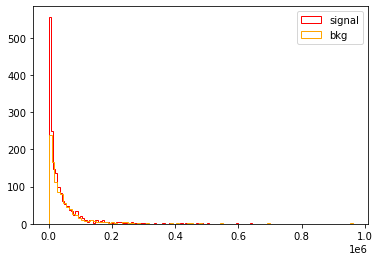

500GeV
lepton1_px


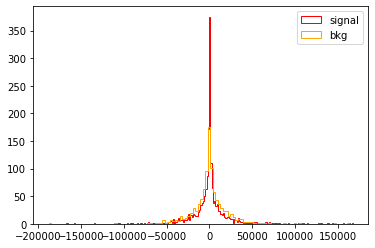

500GeV
lepton1_py


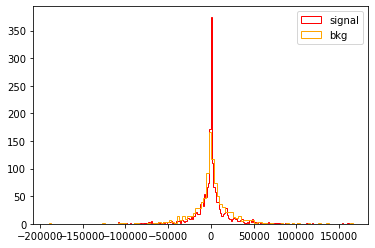

500GeV
lepton1_pz


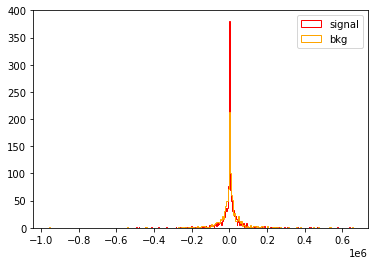

500GeV
lepton2_E


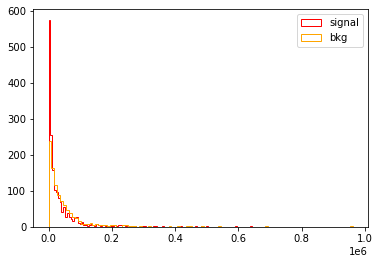

500GeV
lepton2_px


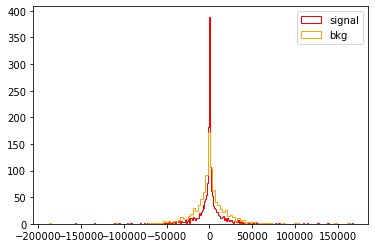

500GeV
lepton2_py


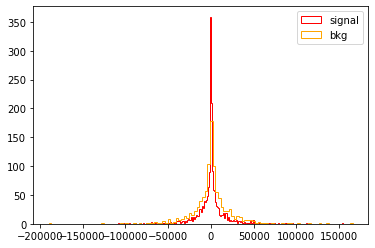

500GeV
lepton2_pz


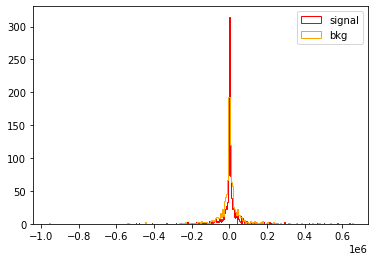

500GeV
lepton3_E


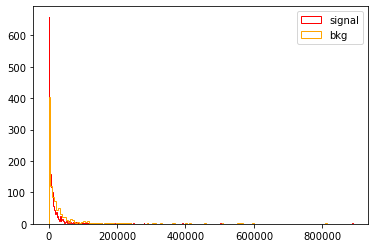

500GeV
lepton3_px


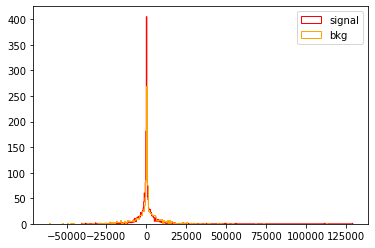

500GeV
lepton3_py


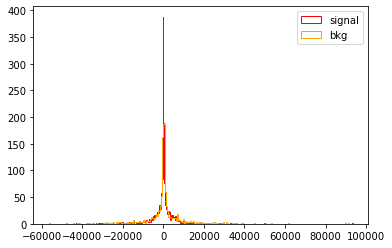

500GeV
lepton3_pz


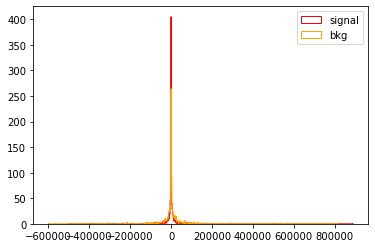

500GeV
MET_E


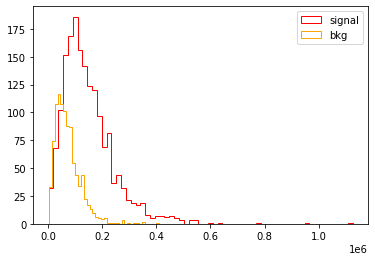

500GeV
MET_px


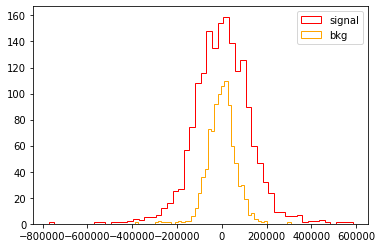

500GeV
MET_py


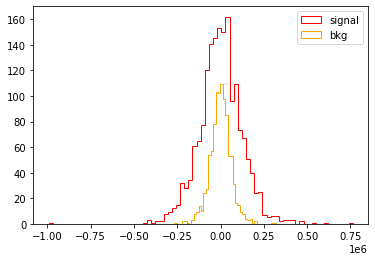

500GeV
MET_pz


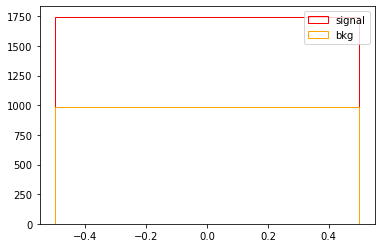

500GeV
signal


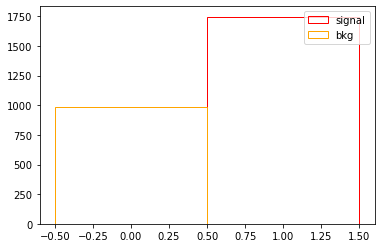

600GeV
lepton1_E


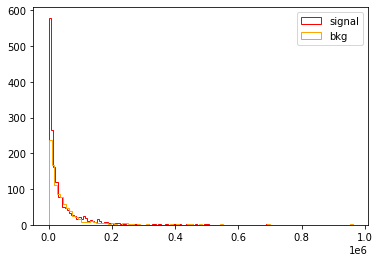

600GeV
lepton1_px


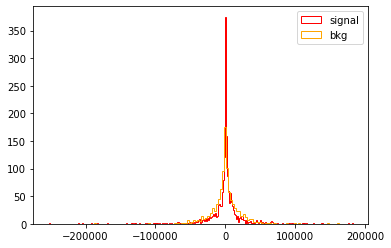

600GeV
lepton1_py


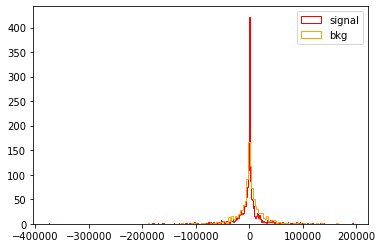

600GeV
lepton1_pz


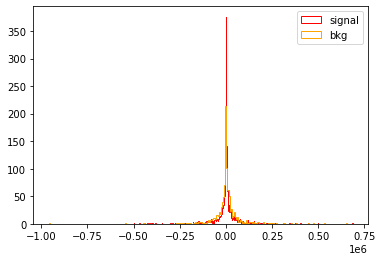

600GeV
lepton2_E


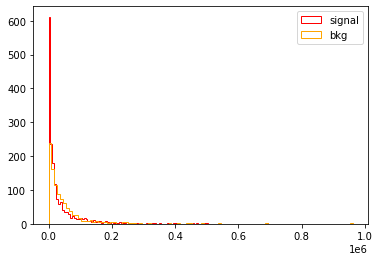

600GeV
lepton2_px


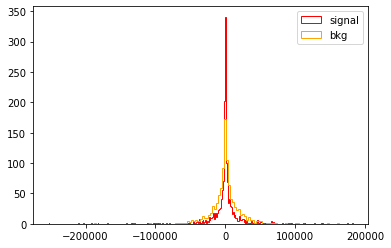

600GeV
lepton2_py


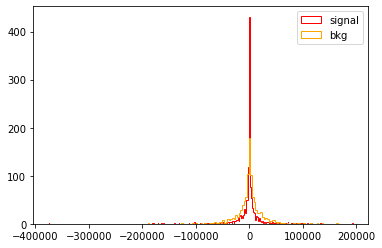

600GeV
lepton2_pz


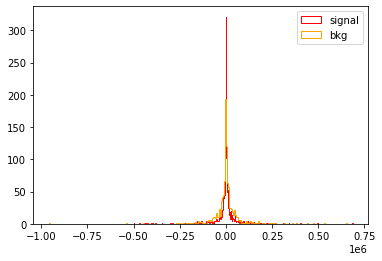

600GeV
lepton3_E


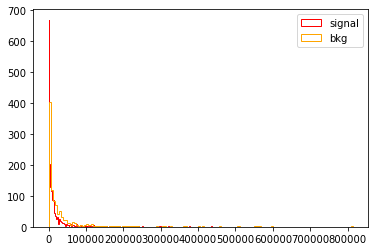

600GeV
lepton3_px


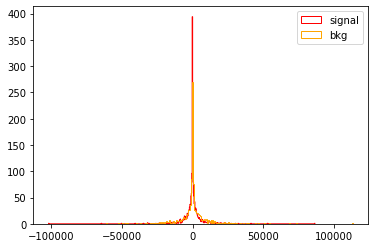

600GeV
lepton3_py


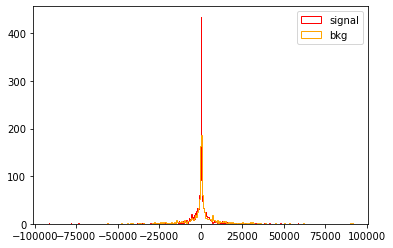

600GeV
lepton3_pz


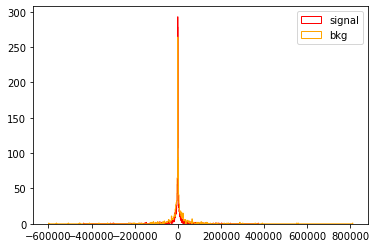

600GeV
MET_E


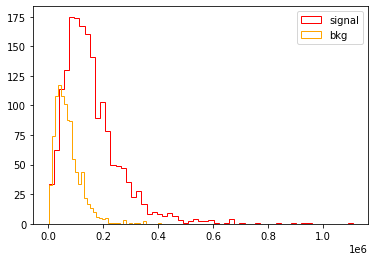

600GeV
MET_px


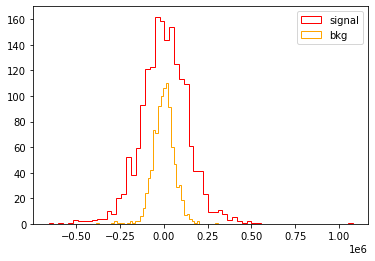

600GeV
MET_py


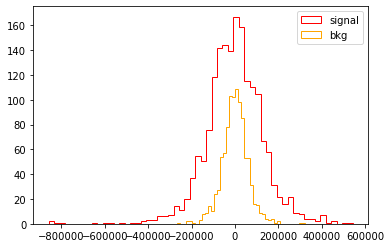

600GeV
MET_pz


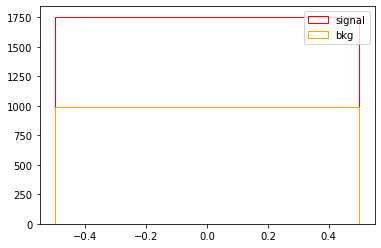

600GeV
signal


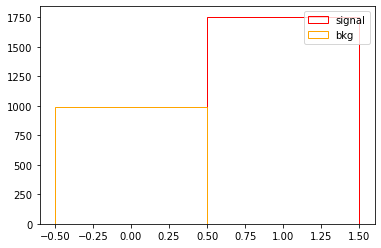

700GeV
lepton1_E


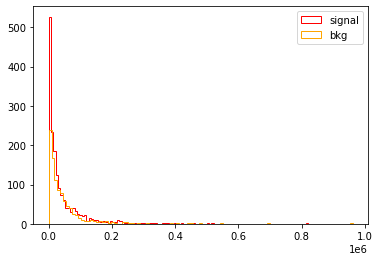

700GeV
lepton1_px


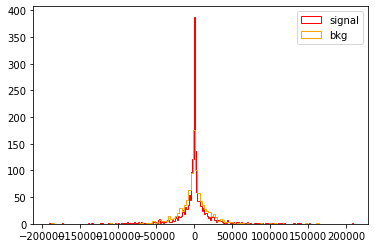

700GeV
lepton1_py


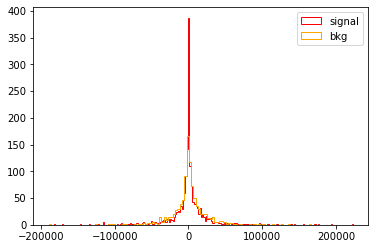

700GeV
lepton1_pz


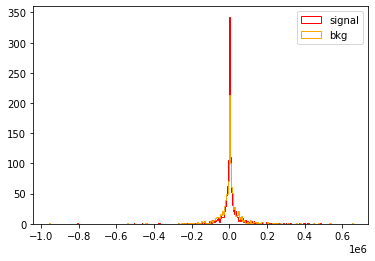

700GeV
lepton2_E


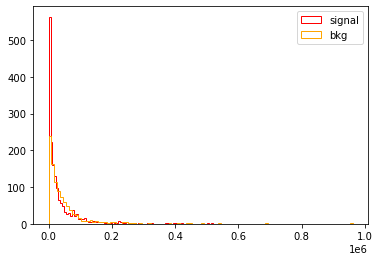

700GeV
lepton2_px


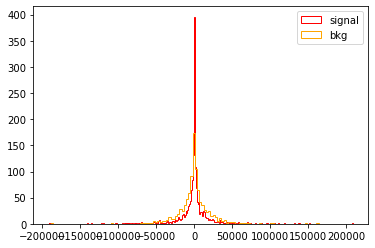

700GeV
lepton2_py


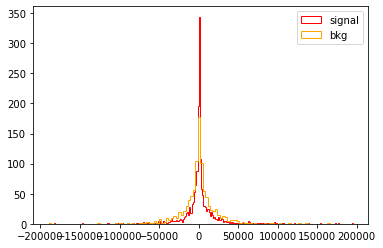

700GeV
lepton2_pz


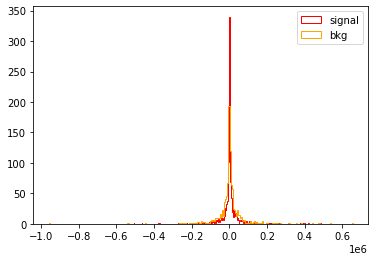

700GeV
lepton3_E


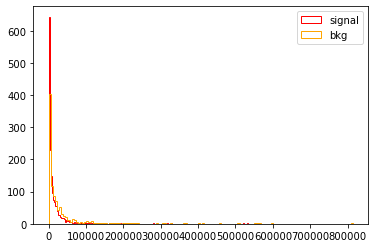

700GeV
lepton3_px


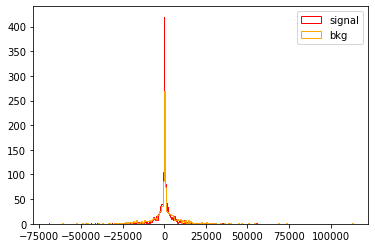

700GeV
lepton3_py


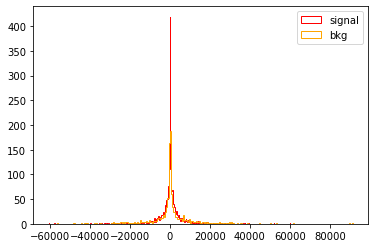

700GeV
lepton3_pz


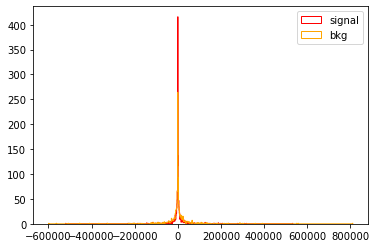

700GeV
MET_E


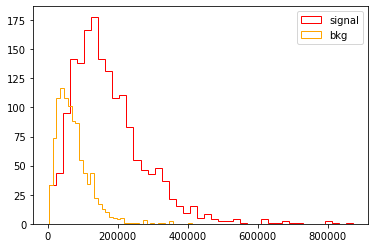

700GeV
MET_px


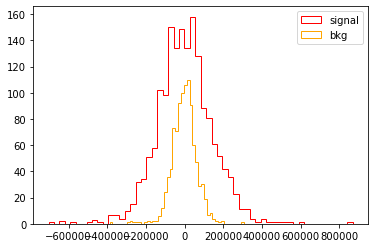

700GeV
MET_py


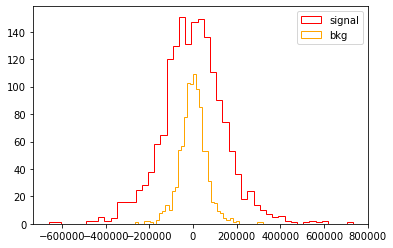

700GeV
MET_pz


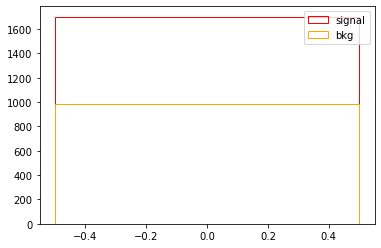

700GeV
signal


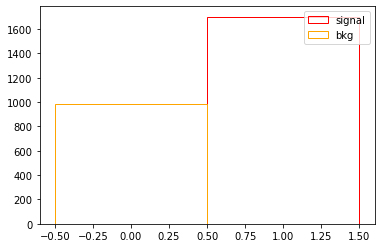

800GeV
lepton1_E


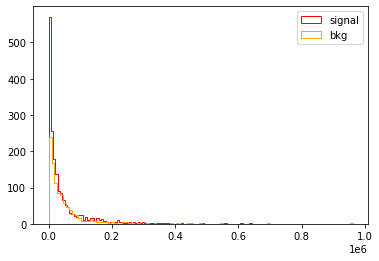

800GeV
lepton1_px


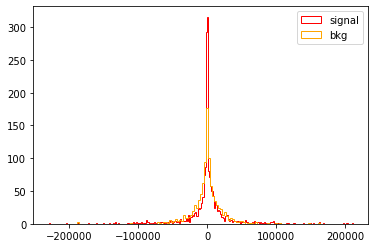

800GeV
lepton1_py


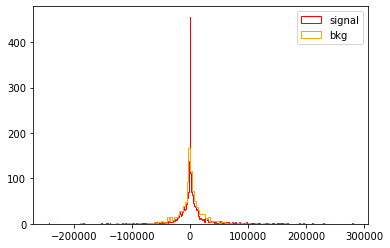

800GeV
lepton1_pz


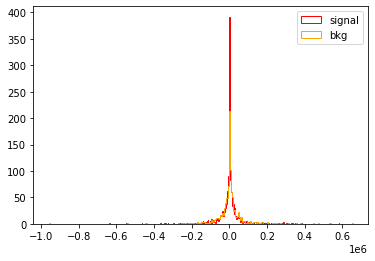

800GeV
lepton2_E


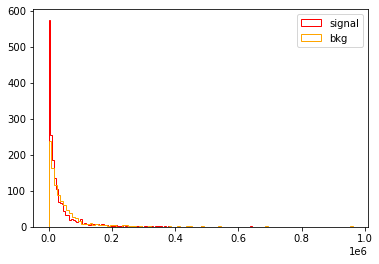

800GeV
lepton2_px


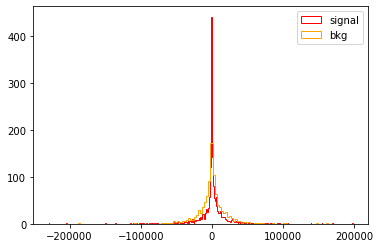

800GeV
lepton2_py


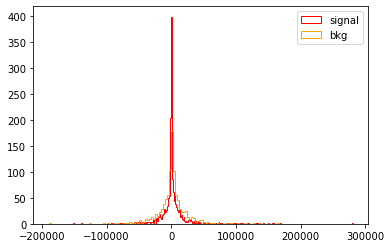

800GeV
lepton2_pz


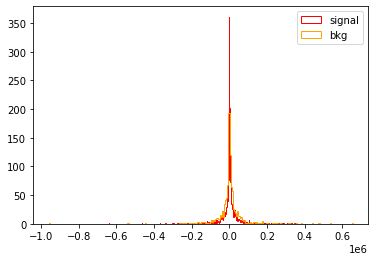

800GeV
lepton3_E


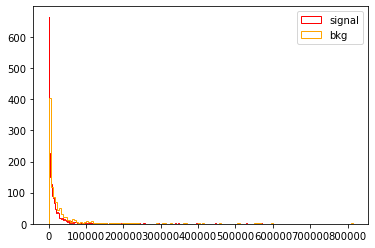

800GeV
lepton3_px


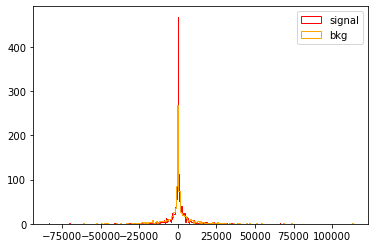

800GeV
lepton3_py


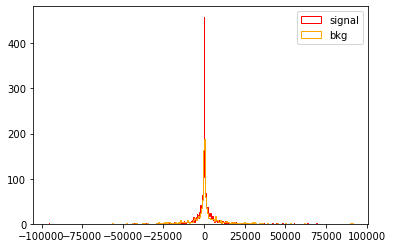

800GeV
lepton3_pz


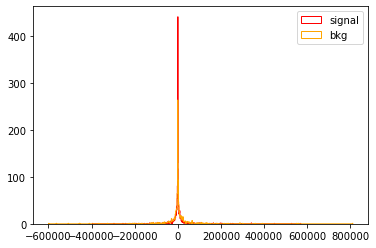

800GeV
MET_E


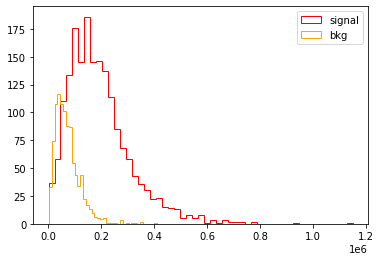

800GeV
MET_px


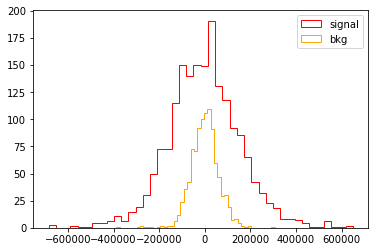

800GeV
MET_py


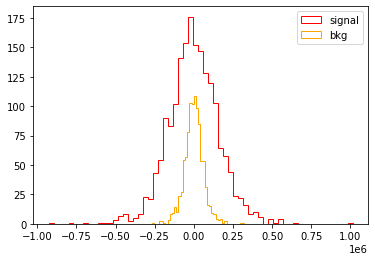

800GeV
MET_pz


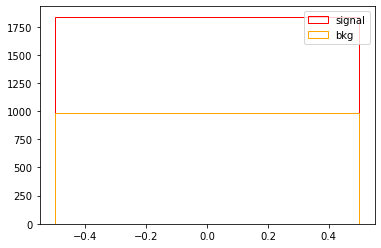

800GeV
signal


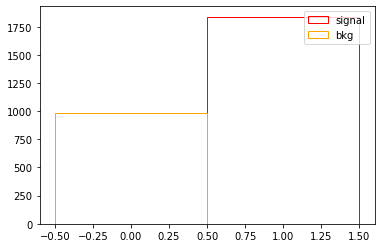

1000GeV
lepton1_E


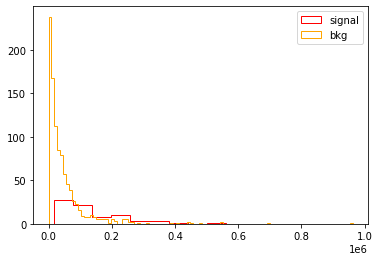

1000GeV
lepton1_px


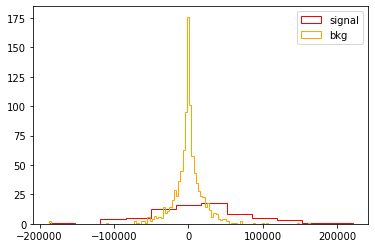

1000GeV
lepton1_py


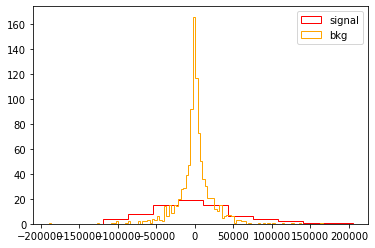

1000GeV
lepton1_pz


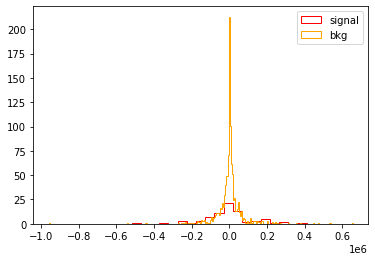

1000GeV
lepton2_E


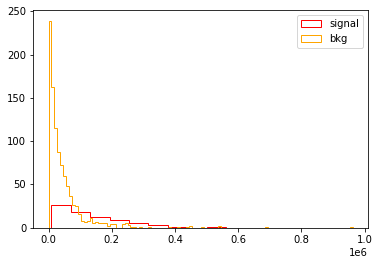

1000GeV
lepton2_px


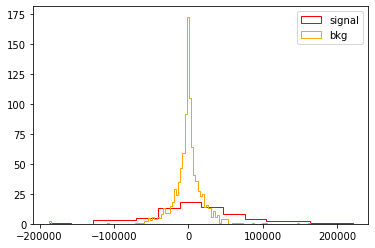

1000GeV
lepton2_py


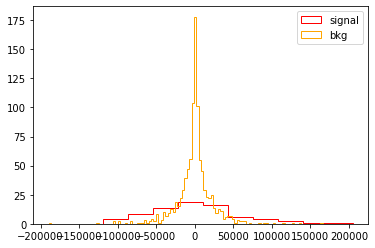

1000GeV
lepton2_pz


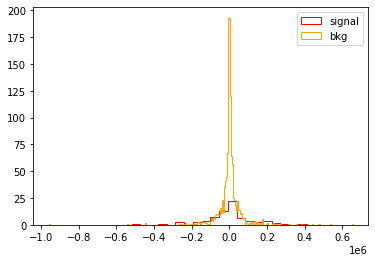

1000GeV
lepton3_E


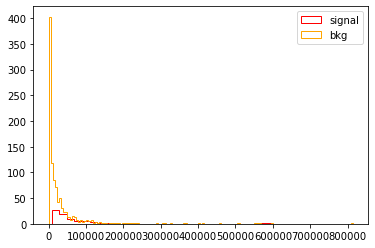

1000GeV
lepton3_px


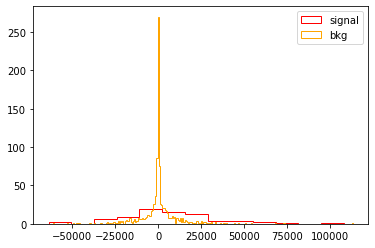

1000GeV
lepton3_py


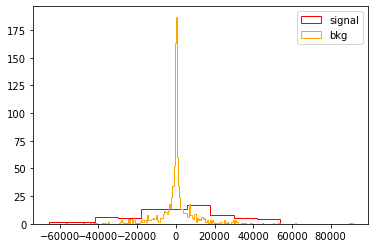

1000GeV
lepton3_pz


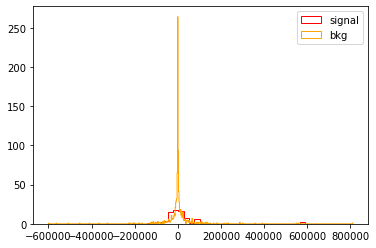

1000GeV
MET_E


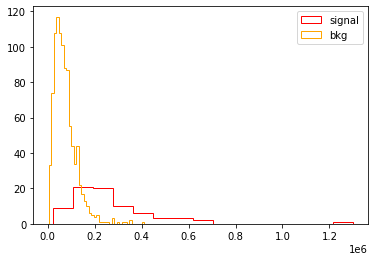

1000GeV
MET_px


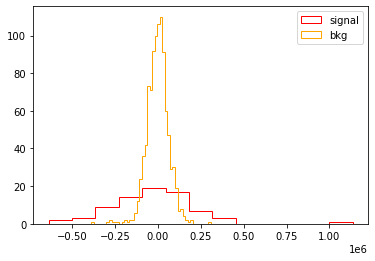

1000GeV
MET_py


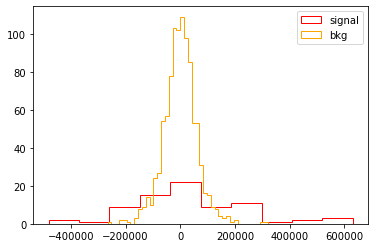

1000GeV
MET_pz


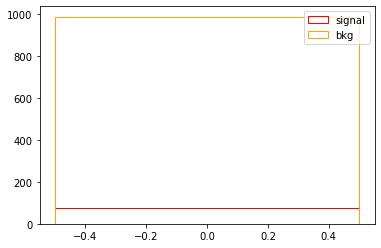

1000GeV
signal


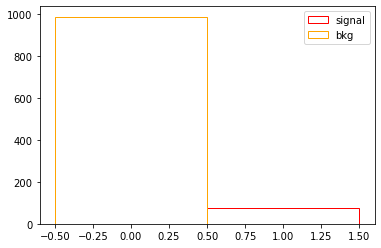

In [13]:
SignalPlotLoop(df_sig, df_bkg)

In [14]:
#standardize stuff function
min_max_scaler = preprocessing.MinMaxScaler()

def standardize_stuff(n):
    print ("HI", n, n.min(),n.max())
    return (n - n.min())/(n.max() - n.min())

In [15]:
series_list_500 = []
series_list_600 = [] 
series_list_700 = []
series_list_800 = [] 
series_list_1000 = []
series_list = [series_list_500,series_list_600,series_list_700,series_list_800,series_list_1000]
df_norm_sig = ['df_norm_sig500','df_norm_sig600','df_norm_sig700','df_norm_sig800','df_norm_sig1000']

In [16]:
#standardize signal stuff
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        if var == "signal":
            series_list[sig].append(df_sig[sig][var])
            continue
        if var == "MET_pz":
            series_list[sig].append(df_sig[sig][var])
            continue
        print (df_sig[sig][var])
        print (df_sig[sig][var].min())
        print (df_sig[sig][var].max())
        print (standardize_stuff(df_sig[sig][var]))
        print (series_list[sig].append((df_sig[sig][var] - df_sig[sig][var].min())/(df_sig[sig][var].max() - df_sig[sig][var].min())))

    df_norm_sig[sig] = pd.DataFrame(series_list[sig]).T

500GeV
lepton1_E
0       150260.312500
1       214014.625000
2        11471.833008
3         3502.883789
4        48865.519531
            ...      
1742      2020.433350
1743      5564.291016
1744      2741.546143
1745       917.551575
1746      5128.961914
Name: lepton1_E, Length: 1747, dtype: float64
20.74315452575684
642807.875
HI 0       150260.312500
1       214014.625000
2        11471.833008
3         3502.883789
4        48865.519531
            ...      
1742      2020.433350
1743      5564.291016
1744      2741.546143
1745       917.551575
1746      5128.961914
Name: lepton1_E, Length: 1747, dtype: float64 20.74315452575684 642807.875
0       0.233731
1       0.332916
2       0.017815
3       0.005417
4       0.075989
          ...   
1742    0.003111
1743    0.008624
1744    0.004233
1745    0.001395
1746    0.007947
Name: lepton1_E, Length: 1747, dtype: float64
None
500GeV
lepton1_px
0      -52309.242188
1       11554.788086
2         699.283203
3        -229.472733
4     

600GeV
lepton1_E
0         9008.084961
1        10887.734375
2        63129.117188
3         4640.249023
4        38680.789062
            ...      
1750      7253.317383
1751     24386.451172
1752     21813.626953
1753    127202.664062
1754      1211.776001
Name: lepton1_E, Length: 1755, dtype: float64
13.559164047241213
695333.0
HI 0         9008.084961
1        10887.734375
2        63129.117188
3         4640.249023
4        38680.789062
            ...      
1750      7253.317383
1751     24386.451172
1752     21813.626953
1753    127202.664062
1754      1211.776001
Name: lepton1_E, Length: 1755, dtype: float64 13.559164047241213 695333.0
0       0.012936
1       0.015639
2       0.090772
3       0.006654
4       0.055611
          ...   
1750    0.010412
1751    0.035053
1752    0.031353
1753    0.182922
1754    0.001723
Name: lepton1_E, Length: 1755, dtype: float64
None
600GeV
lepton1_px
0        6218.035156
1        2730.947998
2       30595.296875
3        1354.718994
4       

700GeV
lepton1_E
0        63183.066406
1          149.650864
2          296.191071
3        24044.863281
4        66991.593750
            ...      
1696    101025.093750
1697     85590.148438
1698     22861.943359
1699      9013.555664
1700     93084.968750
Name: lepton1_E, Length: 1701, dtype: float64
16.096660614013672
821122.1875
HI 0        63183.066406
1          149.650864
2          296.191071
3        24044.863281
4        66991.593750
            ...      
1696    101025.093750
1697     85590.148438
1698     22861.943359
1699      9013.555664
1700     93084.968750
Name: lepton1_E, Length: 1701, dtype: float64 16.096660614013672 821122.1875
0       0.076929
1       0.000163
2       0.000341
3       0.029264
4       0.081567
          ...   
1696    0.123016
1697    0.104218
1698    0.027823
1699    0.010958
1700    0.113346
Name: lepton1_E, Length: 1701, dtype: float64
None
700GeV
lepton1_px
0       55883.902344
1         -31.165728
2        -186.861740
3       -1150.551392
4 

800GeV
lepton1_E
0         779.705566
1       29229.566406
2       12860.883789
3       53285.410156
4        1531.248169
            ...     
1834    11667.951172
1835    25939.451172
1836     8949.708984
1837     2162.532471
1838    83383.960938
Name: lepton1_E, Length: 1839, dtype: float64
18.617176055908203
642330.9375
HI 0         779.705566
1       29229.566406
2       12860.883789
3       53285.410156
4        1531.248169
            ...     
1834    11667.951172
1835    25939.451172
1836     8949.708984
1837     2162.532471
1838    83383.960938
Name: lepton1_E, Length: 1839, dtype: float64 18.617176055908203 642330.9375
0       0.001185
1       0.045478
2       0.019994
3       0.082930
4       0.002355
          ...   
1834    0.018137
1835    0.040355
1836    0.013905
1837    0.003338
1838    0.129789
Name: lepton1_E, Length: 1839, dtype: float64
None
800GeV
lepton1_px
0         509.809570
1        9730.357422
2       12812.645508
3       24077.699219
4         632.266174
   

1000GeV
lepton1_E
0     344963.906250
1     200348.203125
2     153911.312500
3      74926.554688
4      22955.949219
          ...      
70    193759.265625
71     98019.281250
72     16624.869141
73    165763.765625
74     35491.609375
Name: lepton1_E, Length: 75, dtype: float64
16624.869140625
562236.6875
HI 0     344963.906250
1     200348.203125
2     153911.312500
3      74926.554688
4      22955.949219
          ...      
70    193759.265625
71     98019.281250
72     16624.869141
73    165763.765625
74     35491.609375
Name: lepton1_E, Length: 75, dtype: float64 16624.869140625 562236.6875
0     0.601781
1     0.336729
2     0.251619
3     0.106856
4     0.011604
        ...   
70    0.324653
71    0.149180
72    0.000000
73    0.273342
74    0.034579
Name: lepton1_E, Length: 75, dtype: float64
None
1000GeV
lepton1_px
0      26755.947266
1     -73119.226562
2      40017.222656
3      28503.699219
4     -17557.457031
          ...      
70    117902.898438
71     94714.359375
72

In [17]:
#standardize bkg stuff
series_list_bkg = []
for var in df_bkg.columns:
    print(var)
    if var == "signal":
        series_list_bkg.append(df_bkg[var])
        continue
    if var == "MET_pz":
        series_list_bkg.append(df_bkg[var])
        continue
#    print (df_sig[var])
    print(df_bkg[var].min())
    print(df_bkg[var].max())
    print (standardize_stuff(df_bkg[var]))
    print (series_list_bkg.append((df_bkg[var] - df_bkg[var].min())/(df_bkg[var].max() - df_bkg[var].min())))

df_norm_bkg = pd.DataFrame(series_list_bkg).T

lepton1_E
89.34738159179688
962567.4375
HI 0      17944.218750
1      57937.394531
2      17559.396484
3      65493.871094
4      11435.557617
           ...     
983    98819.421875
984     9930.823242
985     7772.693359
986    14153.073242
987    14369.820312
Name: lepton1_E, Length: 988, dtype: float64 89.34738159179688 962567.4375
0      0.018551
1      0.060103
2      0.018151
3      0.067954
4      0.011789
         ...   
983    0.102579
984    0.010225
985    0.007983
986    0.014612
987    0.014837
Name: lepton1_E, Length: 988, dtype: float64
None
lepton1_px
-187938.734375
163443.125
HI 0      1466.890381
1     -6740.514648
2      7939.450195
3     -1949.872559
4      1655.693115
          ...     
983     298.383453
984    1485.731079
985   -5186.436523
986    2290.824951
987   -1226.179321
Name: lepton1_px, Length: 988, dtype: float64 -187938.734375 163443.125
0      0.539031
1      0.515673
2      0.557451
3      0.529307
4      0.539568
         ...   
983    0.535705
984

In [18]:
df_norm_bkg

,lepton1_E,lepton1_px,lepton1_py,lepton1_pz,lepton2_E,lepton2_px,lepton2_py,lepton2_pz,lepton3_E,lepton3_px,lepton3_py,lepton3_pz,MET_E,MET_px,MET_py,MET_pz,signal
0,0.018551,0.539031,0.501732,0.585705,0.018551,0.539031,0.501732,0.585705,0.005212,0.349814,0.360612,0.422888,0.205419,0.466494,0.352699,0.0,0.0
1,0.060103,0.515673,0.534462,0.629879,0.060103,0.515673,0.534462,0.629879,0.000207,0.350174,0.382478,0.424775,0.270431,0.543117,0.260917,0.0,0.0
2,0.018151,0.557451,0.523478,0.584856,0.018151,0.557451,0.523478,0.584856,0.017110,0.386798,0.401844,0.416290,0.214411,0.472750,0.569923,0.0,0.0
3,0.067954,0.529307,0.696159,0.613205,0.067954,0.529307,0.696159,0.613205,0.002184,0.358266,0.389361,0.425299,0.064092,0.588338,0.418283,0.0,0.0
4,0.011789,0.539568,0.531925,0.587301,0.011789,0.539568,0.531925,0.587301,0.000382,0.350541,0.381373,0.424660,0.055135,0.589398,0.477005,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.102579,0.535705,0.448120,0.536128,0.102579,0.535705,0.448120,0.536128,0.037389,0.257651,0.369676,0.406678,0.155334,0.474306,0.398939,0.0,0.0
984,0.010225,0.539084,0.525390,0.588482,0.010225,0.539084,0.525390,0.588482,0.009154,0.354932,0.363931,0.419964,0.278599,0.648473,0.621290,0.0,0.0
985,0.007983,0.520096,0.538870,0.597665,0.007983,0.520096,0.538870,0.597665,0.002190,0.349417,0.380246,0.423624,0.278339,0.711016,0.370741,0.0,0.0
986,0.014612,0.541376,0.523014,0.602620,0.014612,0.541376,0.523014,0.602620,0.000734,0.352522,0.384560,0.425143,0.090234,0.544754,0.519605,0.0,0.0


500GeV
lepton1_E


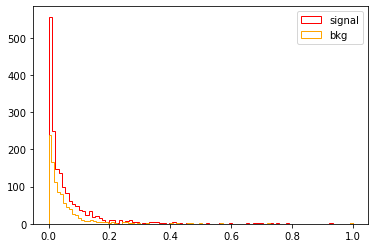

500GeV
lepton1_px


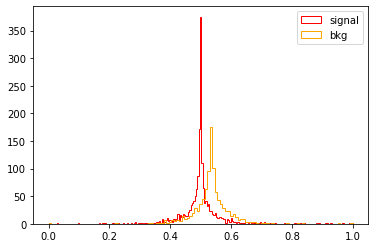

500GeV
lepton1_py


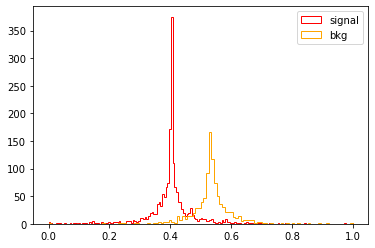

500GeV
lepton1_pz


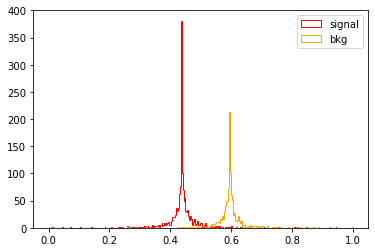

500GeV
lepton2_E


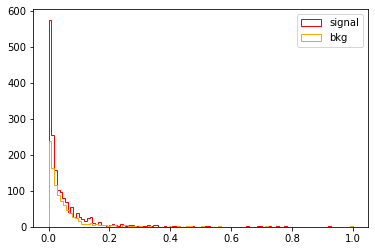

500GeV
lepton2_px


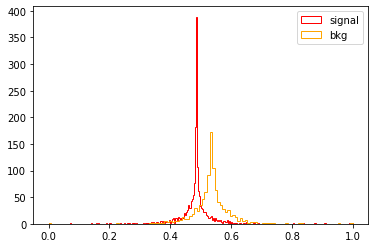

500GeV
lepton2_py


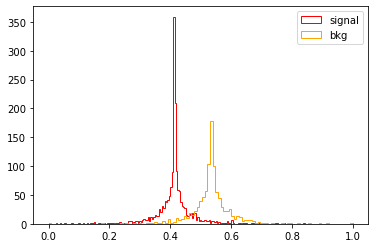

500GeV
lepton2_pz


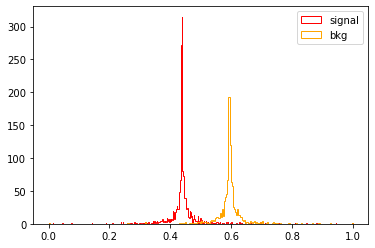

500GeV
lepton3_E


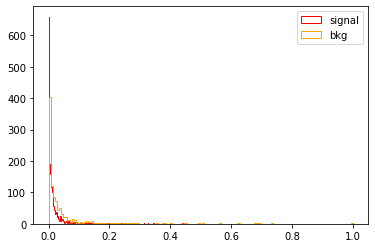

500GeV
lepton3_px


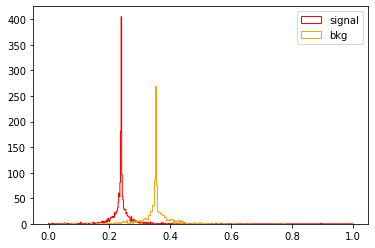

500GeV
lepton3_py


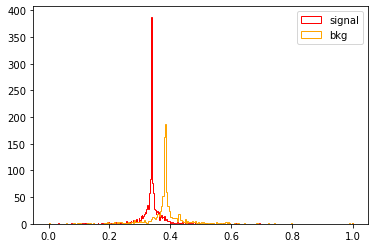

500GeV
lepton3_pz


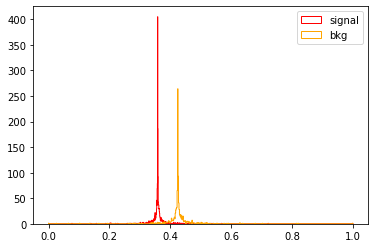

500GeV
MET_E


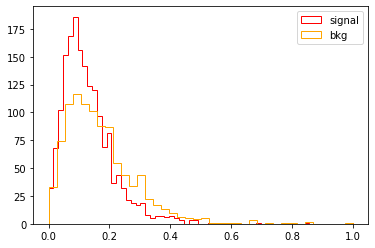

500GeV
MET_px


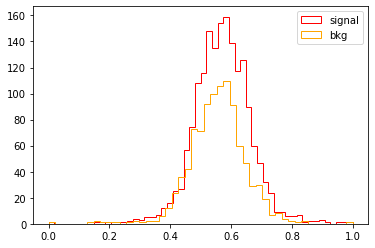

500GeV
MET_py


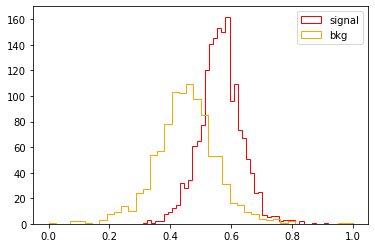

500GeV
MET_pz


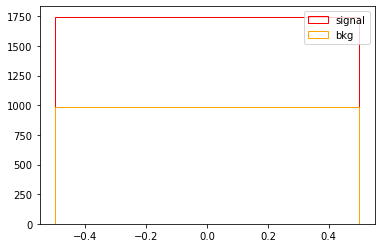

500GeV
signal


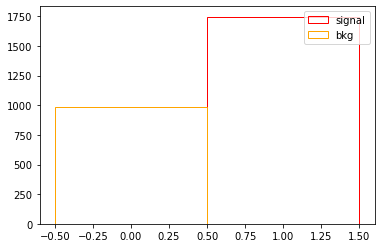

600GeV
lepton1_E


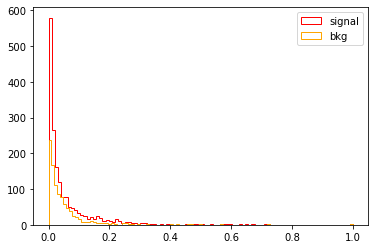

600GeV
lepton1_px


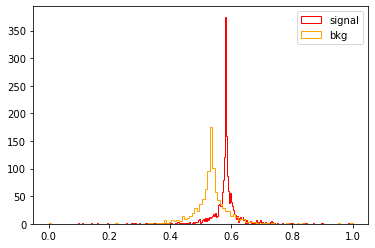

600GeV
lepton1_py


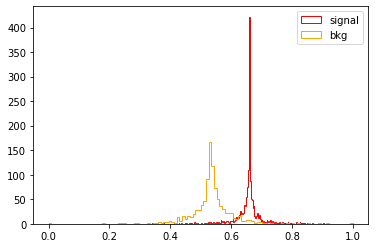

600GeV
lepton1_pz


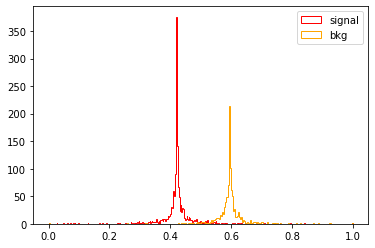

600GeV
lepton2_E


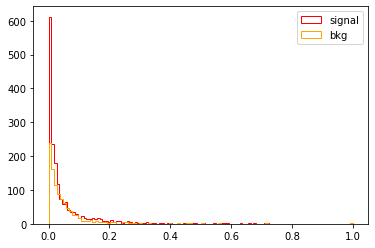

600GeV
lepton2_px


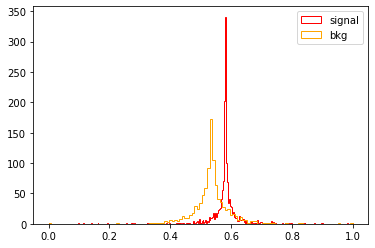

600GeV
lepton2_py


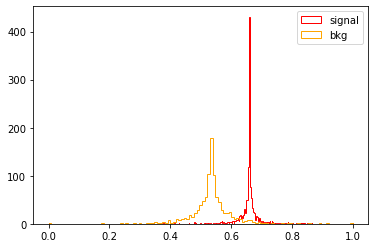

600GeV
lepton2_pz


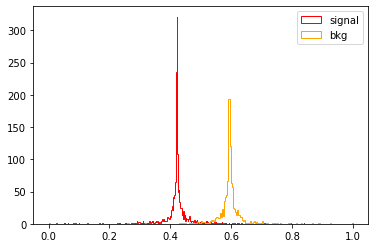

600GeV
lepton3_E


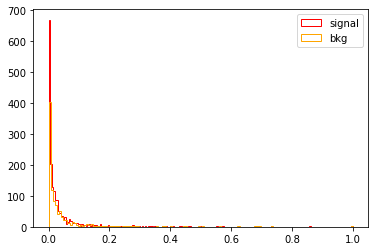

600GeV
lepton3_px


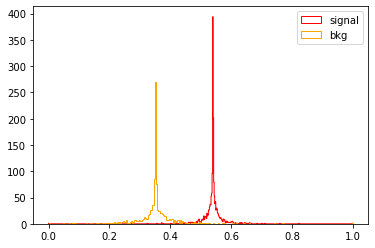

600GeV
lepton3_py


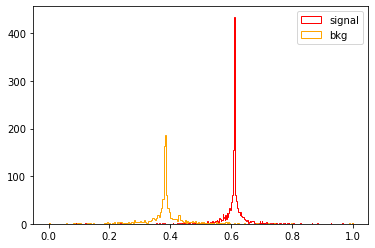

600GeV
lepton3_pz


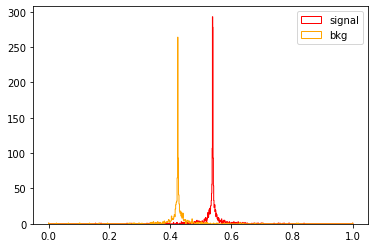

600GeV
MET_E


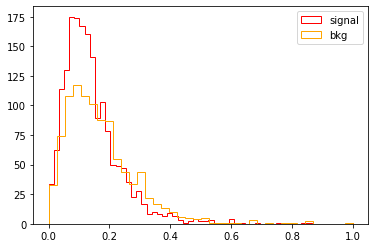

600GeV
MET_px


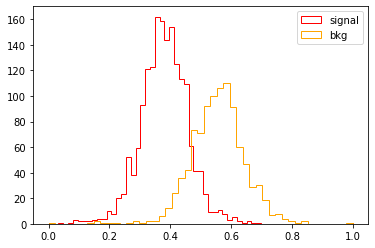

600GeV
MET_py


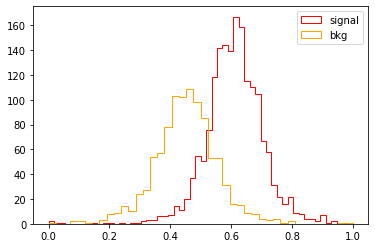

600GeV
MET_pz


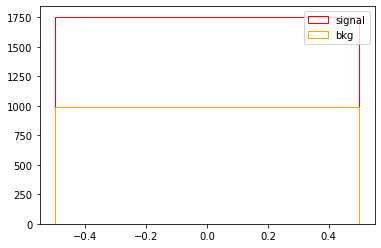

600GeV
signal


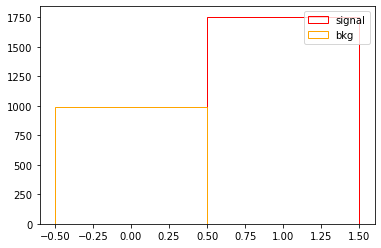

700GeV
lepton1_E


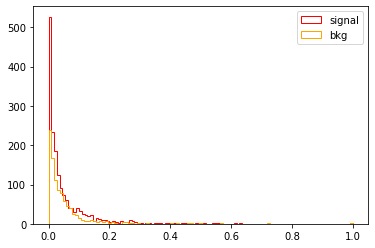

700GeV
lepton1_px


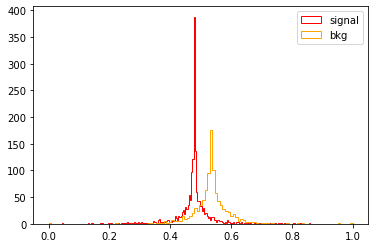

700GeV
lepton1_py


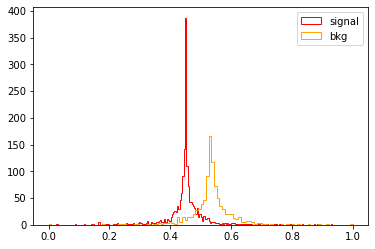

700GeV
lepton1_pz


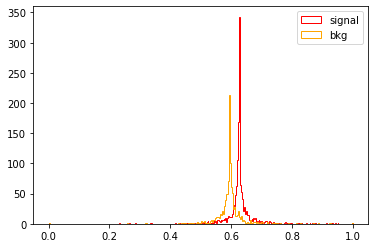

700GeV
lepton2_E


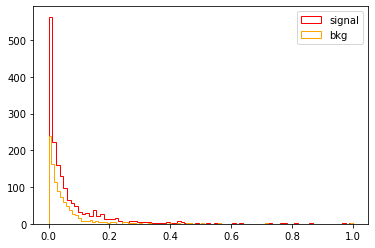

700GeV
lepton2_px


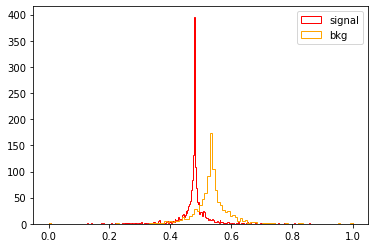

700GeV
lepton2_py


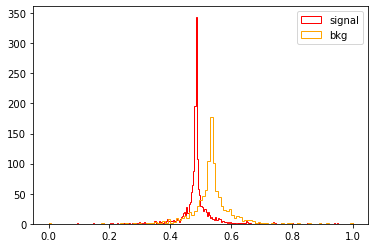

700GeV
lepton2_pz


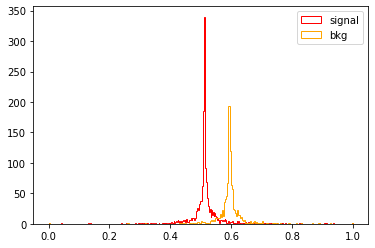

700GeV
lepton3_E


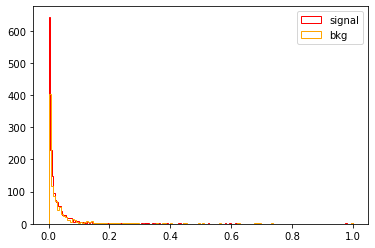

700GeV
lepton3_px


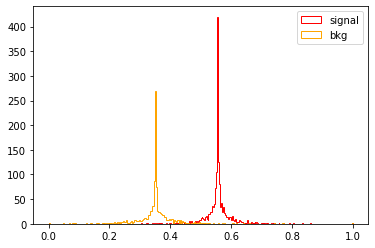

700GeV
lepton3_py


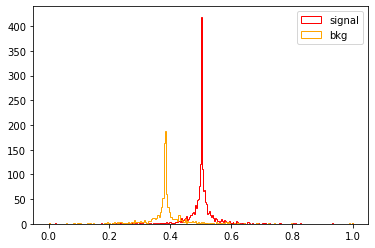

700GeV
lepton3_pz


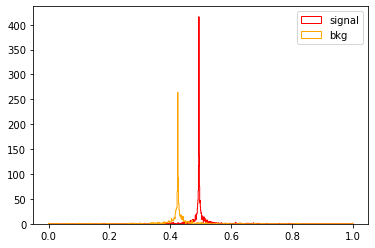

700GeV
MET_E


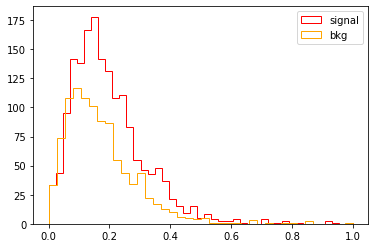

700GeV
MET_px


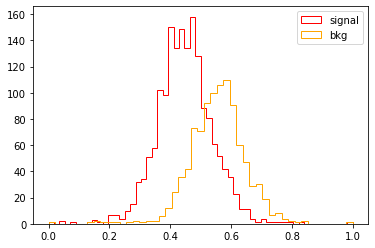

700GeV
MET_py


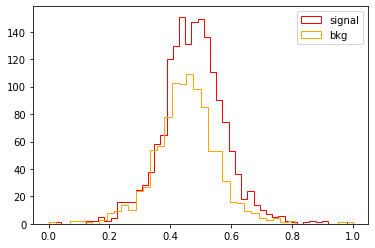

700GeV
MET_pz


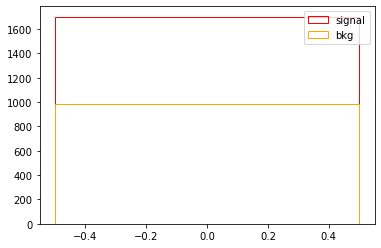

700GeV
signal


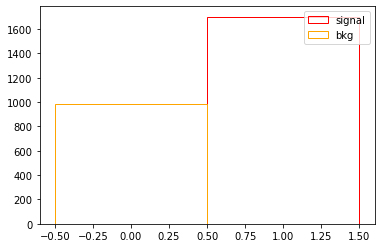

800GeV
lepton1_E


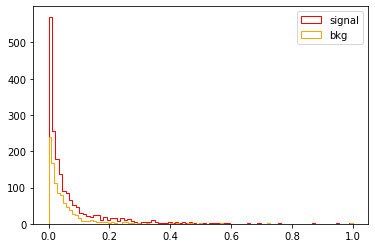

800GeV
lepton1_px


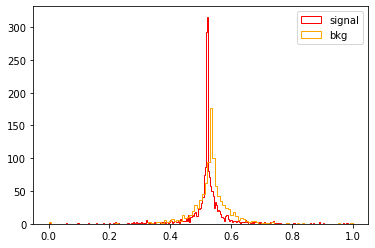

800GeV
lepton1_py


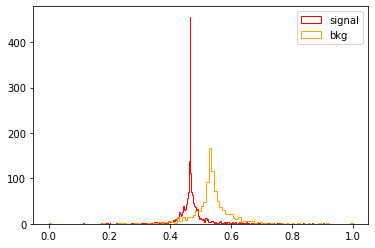

800GeV
lepton1_pz


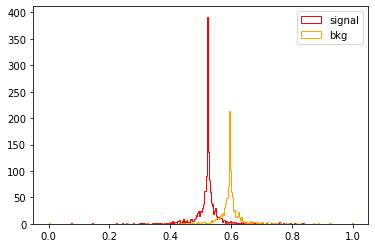

800GeV
lepton2_E


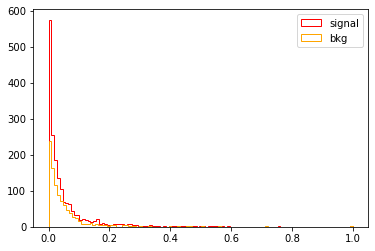

800GeV
lepton2_px


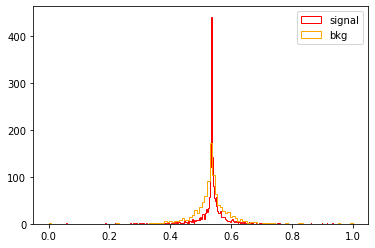

800GeV
lepton2_py


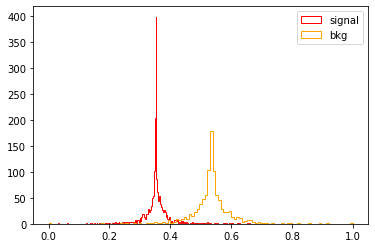

800GeV
lepton2_pz


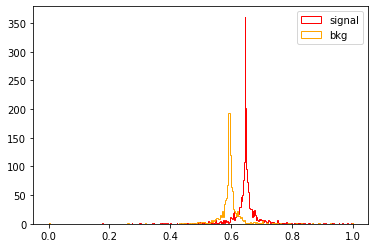

800GeV
lepton3_E


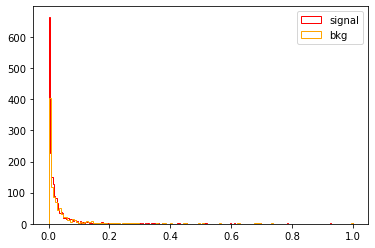

800GeV
lepton3_px


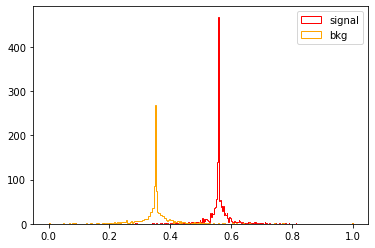

800GeV
lepton3_py


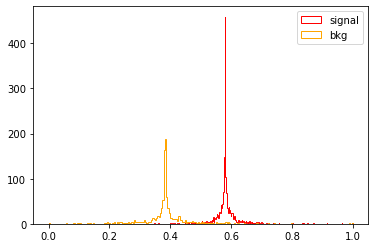

800GeV
lepton3_pz


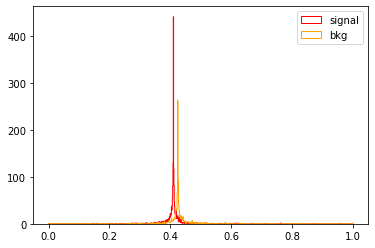

800GeV
MET_E


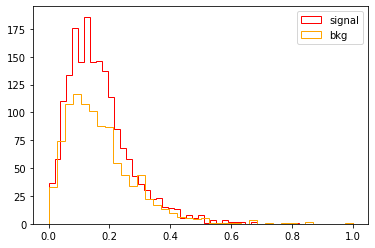

800GeV
MET_px


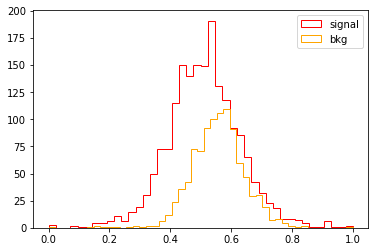

800GeV
MET_py


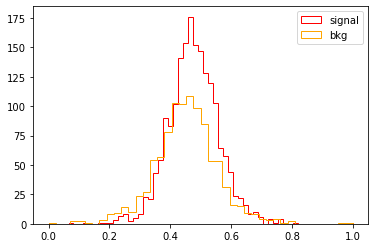

800GeV
MET_pz


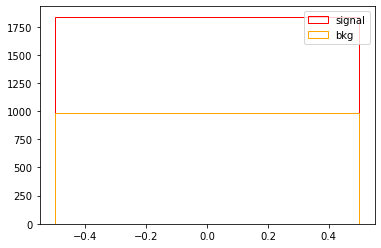

800GeV
signal


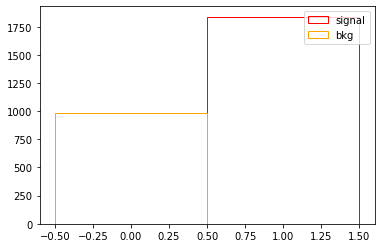

1000GeV
lepton1_E


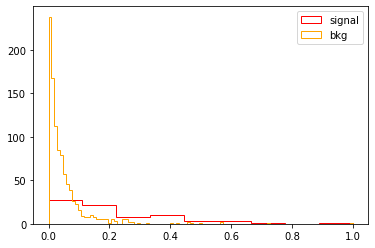

1000GeV
lepton1_px


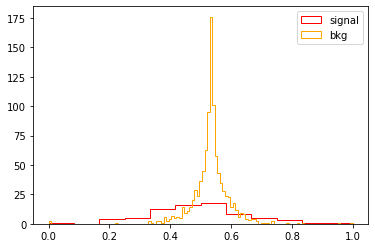

1000GeV
lepton1_py


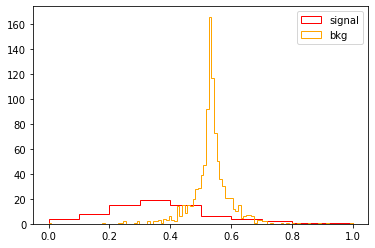

1000GeV
lepton1_pz


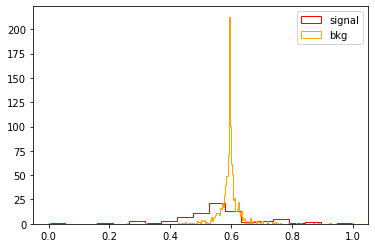

1000GeV
lepton2_E


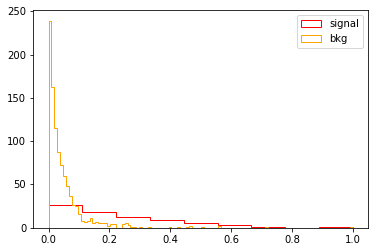

1000GeV
lepton2_px


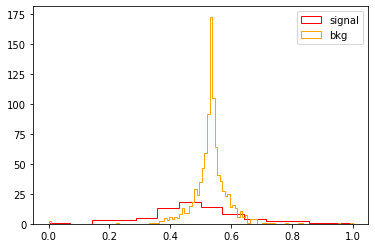

1000GeV
lepton2_py


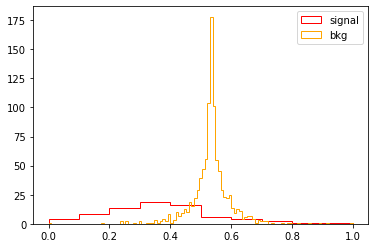

1000GeV
lepton2_pz


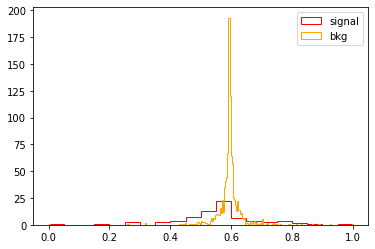

1000GeV
lepton3_E


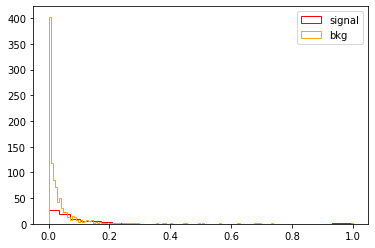

1000GeV
lepton3_px


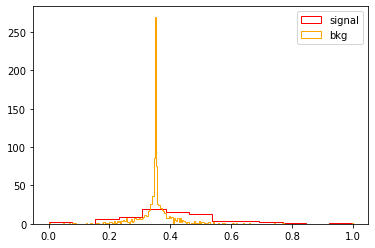

1000GeV
lepton3_py


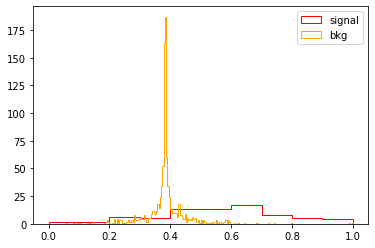

1000GeV
lepton3_pz


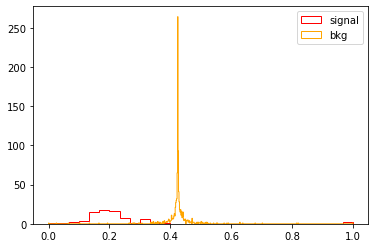

1000GeV
MET_E


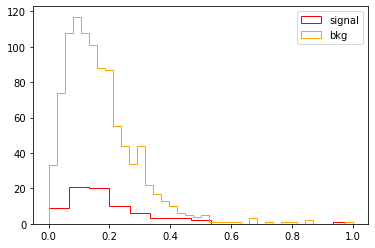

1000GeV
MET_px


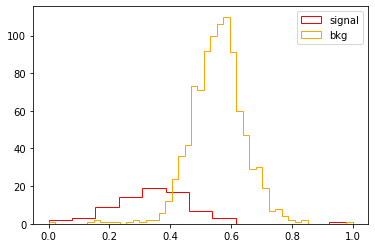

1000GeV
MET_py


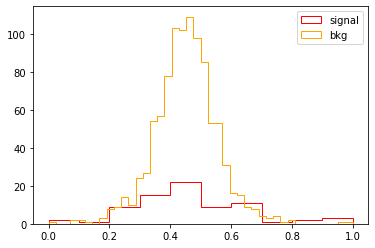

1000GeV
MET_pz


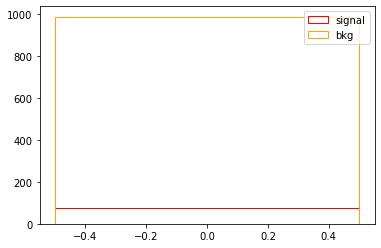

1000GeV
signal


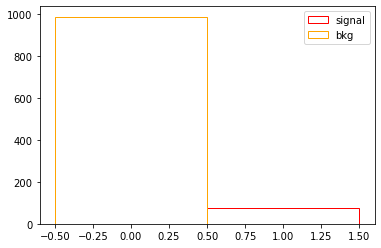

In [19]:
SignalPlotLoop(df_norm_sig, df_norm_bkg)

In [20]:
df_train_500, df_test_500, x_train_500, y_train_500, x_test_500, y_test_500 = DefineTrainTest(df_norm_sig[0], df_norm_bkg)
df_train_600, df_test_600, x_train_600, y_train_600, x_test_600, y_test_600 = DefineTrainTest(df_norm_sig[1], df_norm_bkg)
df_train_700, df_test_700, x_train_700, y_train_700, x_test_700, y_test_700 = DefineTrainTest(df_norm_sig[2], df_norm_bkg)
df_train_800, df_test_800, x_train_800, y_train_800, x_test_800, y_test_800 = DefineTrainTest(df_norm_sig[3], df_norm_bkg)
df_train_1000, df_test_1000, x_train_1000, y_train_1000, x_test_1000, y_test_1000 = DefineTrainTest(df_norm_sig[4], df_norm_bkg)

In [21]:
df_train = [df_train_500,df_train_600,df_train_700,df_train_800,df_train_1000]
df_test = [df_test_500,df_test_600,df_test_700,df_test_800,df_test_1000]
x_train = [x_train_500,x_train_600,x_train_700,x_train_800,x_train_1000]
y_train = [y_train_500,y_train_600,y_train_700,y_train_800,y_train_1000]
x_test = [x_test_500,x_test_600,x_test_700,x_test_800,x_test_1000]
y_test = [y_test_500,y_test_600,y_test_700,y_test_800,y_test_1000]

In [22]:
for sig in range(len(x_train)):
    print (mass_points[sig])
    print (np.shape(x_train[sig]))
    print (np.shape(y_test[sig]))

500GeV
(1367, 16)
(1368,)
600GeV
(1371, 16)
(1372,)
700GeV
(1344, 16)
(1345,)
800GeV
(1413, 16)
(1414,)
1000GeV
(531, 16)
(532,)


In [23]:
x_train[0]

,lepton1_E,lepton1_px,lepton1_py,lepton1_pz,lepton2_E,lepton2_px,lepton2_py,lepton2_pz,lepton3_E,lepton3_px,lepton3_py,lepton3_pz,MET_E,MET_px,MET_py,MET_pz
0,0.008623,0.549708,0.543802,0.590931,0.008623,0.549708,0.543802,0.590931,0.001590,0.346425,0.378867,0.425512,0.052826,0.523148,0.460161,0.0
1,0.089068,0.432499,0.488407,0.394908,0.089094,0.415884,0.500693,0.396052,0.006524,0.224092,0.352690,0.355276,0.259190,0.765797,0.495598,0.0
2,0.003010,0.533565,0.540098,0.595377,0.003010,0.533565,0.540098,0.595377,0.002657,0.348125,0.393830,0.425735,0.147112,0.649178,0.450282,0.0
3,0.026479,0.588943,0.499612,0.586762,0.026479,0.588943,0.499612,0.586762,0.008305,0.348076,0.340539,0.426787,0.209146,0.669470,0.526843,0.0
4,0.051359,0.472892,0.383603,0.464615,0.051387,0.457460,0.393253,0.465627,0.019209,0.214199,0.323822,0.370643,0.197825,0.619247,0.443362,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0.012501,0.495033,0.410233,0.430038,0.012529,0.480249,0.420553,0.431115,0.000011,0.238624,0.338556,0.358787,0.235072,0.763711,0.585452,0.0
1363,0.001109,0.536821,0.536012,0.594370,0.001109,0.536821,0.536012,0.594370,0.000212,0.351454,0.383180,0.424875,0.175007,0.605383,0.339253,0.0
1364,0.007901,0.535950,0.512631,0.595578,0.007901,0.535950,0.512631,0.595578,0.003580,0.352326,0.362610,0.424862,0.310014,0.725758,0.356192,0.0
1365,0.093122,0.523807,0.258470,0.397590,0.093148,0.509866,0.264971,0.398728,0.058389,0.278291,0.102564,0.330510,0.151866,0.469192,0.625553,0.0


In [24]:
x_train[1]

,lepton1_E,lepton1_px,lepton1_py,lepton1_pz,lepton2_E,lepton2_px,lepton2_py,lepton2_pz,lepton3_E,lepton3_px,lepton3_py,lepton3_pz,MET_E,MET_px,MET_py,MET_pz
0,0.171199,0.507115,0.326361,0.685313,0.171199,0.507115,0.326361,0.685313,0.025425,0.356867,0.314270,0.437662,0.139362,0.502102,0.375714,0.0
1,0.022671,0.579659,0.574927,0.591953,0.022671,0.579659,0.574927,0.591953,0.021882,0.397551,0.299218,0.431935,0.170024,0.604152,0.564371,0.0
2,0.145997,0.573905,0.642278,0.336373,0.145997,0.573905,0.642278,0.336373,0.017151,0.516493,0.621949,0.546530,0.234630,0.466577,0.461196,0.0
3,0.709613,0.113730,0.532028,0.794835,0.709613,0.113730,0.532028,0.794835,0.088038,0.685007,0.539156,0.570367,0.102553,0.312632,0.620584,0.0
4,0.035808,0.535412,0.686134,0.421759,0.035808,0.535412,0.686134,0.421759,0.045253,0.460069,0.694536,0.538655,0.193174,0.419404,0.467296,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,0.170674,0.490732,0.825051,0.472459,0.170674,0.490732,0.825051,0.472459,0.023672,0.517911,0.649001,0.548628,0.094565,0.319672,0.633234,0.0
1367,0.071684,0.595530,0.666213,0.379907,0.071684,0.595530,0.666213,0.379907,0.022533,0.546429,0.614849,0.527426,0.056823,0.371400,0.658256,0.0
1368,0.093839,0.566913,0.668510,0.366873,0.093839,0.566913,0.668510,0.366873,0.018828,0.537472,0.615326,0.529389,0.011452,0.387406,0.611423,0.0
1369,0.000046,0.580791,0.659532,0.421440,0.000046,0.580791,0.659532,0.421440,0.000024,0.540546,0.610197,0.539498,0.078923,0.411535,0.563386,0.0


In [25]:
x_train[2]

,lepton1_E,lepton1_px,lepton1_py,lepton1_pz,lepton2_E,lepton2_px,lepton2_py,lepton2_pz,lepton3_E,lepton3_px,lepton3_py,lepton3_pz,MET_E,MET_px,MET_py,MET_pz
0,0.060908,0.462600,0.483783,0.662356,0.096378,0.462600,0.519679,0.559912,0.026867,0.505476,0.418040,0.501818,0.308664,0.505471,0.656998,0.0
1,0.101642,0.484239,0.455816,0.690008,0.004595,0.476698,0.477676,0.510969,0.004473,0.549087,0.484006,0.493330,0.707496,0.479674,0.915820,0.0
2,0.003010,0.533565,0.540098,0.595377,0.003010,0.533565,0.540098,0.595377,0.002657,0.348125,0.393830,0.425735,0.147112,0.649178,0.450282,0.0
3,0.004990,0.485083,0.445349,0.623438,0.000434,0.478532,0.483552,0.512027,0.000423,0.554946,0.502345,0.494326,0.602331,0.585148,0.131593,0.0
4,0.002732,0.477961,0.450131,0.627212,0.004350,0.477961,0.483530,0.514105,0.002261,0.554114,0.501790,0.495292,0.257538,0.581690,0.419332,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0.025023,0.477365,0.499754,0.622718,0.039611,0.477365,0.536835,0.508247,0.004972,0.556080,0.522759,0.493683,0.233534,0.573019,0.438295,0.0
1340,0.024231,0.512943,0.490540,0.604188,0.024231,0.512943,0.490540,0.604188,0.023280,0.407156,0.389202,0.436322,0.326727,0.729984,0.566071,0.0
1341,0.018025,0.521941,0.540734,0.604580,0.018025,0.521941,0.540734,0.604580,0.005420,0.350522,0.381612,0.427991,0.471903,0.835971,0.398689,0.0
1342,0.020032,0.498508,0.417241,0.629948,0.031717,0.498508,0.448200,0.517671,0.017858,0.594410,0.438124,0.496907,0.068841,0.435013,0.432496,0.0


In [26]:
x_train[3]

,lepton1_E,lepton1_px,lepton1_py,lepton1_pz,lepton2_E,lepton2_px,lepton2_py,lepton2_pz,lepton3_E,lepton3_px,lepton3_py,lepton3_pz,MET_E,MET_px,MET_py,MET_pz
0,0.025759,0.491969,0.464421,0.531493,0.025776,0.506655,0.352054,0.657019,0.014289,0.589791,0.578780,0.403482,0.356993,0.236932,0.383395,0.0
1,0.006023,0.520678,0.468029,0.520209,0.006040,0.536221,0.356419,0.643070,0.004213,0.557431,0.586555,0.408112,0.118923,0.580455,0.531765,0.0
2,0.050150,0.540423,0.666803,0.599960,0.050150,0.540423,0.666803,0.599960,0.003362,0.350158,0.399514,0.425547,0.187925,0.619836,0.338557,0.0
3,0.082930,0.575888,0.429819,0.487084,0.082946,0.593079,0.310192,0.602122,0.008253,0.571613,0.569069,0.406324,0.053896,0.560844,0.474649,0.0
4,0.018420,0.522422,0.578832,0.590500,0.018420,0.522422,0.578832,0.590500,0.034278,0.433225,0.380987,0.441809,0.017074,0.564870,0.468846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,0.009837,0.520790,0.510459,0.594552,0.009837,0.520790,0.510459,0.594552,0.559598,0.328362,0.411749,0.101962,0.001979,0.558084,0.446558,0.0
1409,0.001475,0.537673,0.536083,0.593903,0.001475,0.537673,0.536083,0.593903,0.000719,0.353712,0.382160,0.425069,0.058847,0.596987,0.446465,0.0
1410,0.045206,0.499621,0.505550,0.619407,0.045206,0.499621,0.505550,0.619407,0.005734,0.326295,0.388168,0.426014,0.177986,0.602845,0.335563,0.0
1411,0.007927,0.514931,0.472163,0.524198,0.003852,0.533639,0.356702,0.647154,0.003748,0.550636,0.590652,0.410687,0.103402,0.472228,0.532677,0.0


In [27]:
x_train[4]

,lepton1_E,lepton1_px,lepton1_py,lepton1_pz,lepton2_E,lepton2_px,lepton2_py,lepton2_pz,lepton3_E,lepton3_px,lepton3_py,lepton3_pz,MET_E,MET_px,MET_py,MET_pz
0,0.037200,0.520648,0.631463,0.590029,0.037200,0.520648,0.631463,0.590029,0.014097,0.373870,0.405866,0.417655,0.194084,0.485749,0.342472,0.0
1,0.047985,0.519996,0.509626,0.622241,0.047985,0.519996,0.509626,0.622241,0.000347,0.350963,0.382167,0.425064,0.210903,0.477696,0.335117,0.0
2,0.119595,0.560781,0.446763,0.662706,0.119595,0.560781,0.446763,0.662706,0.014157,0.320149,0.450041,0.426133,0.127284,0.493619,0.399066,0.0
3,0.019843,0.527032,0.553192,0.583381,0.019843,0.527032,0.553192,0.583381,0.010406,0.375455,0.377167,0.430011,0.243842,0.672496,0.342537,0.0
4,0.118775,0.342978,0.475146,0.538583,0.118775,0.342978,0.475146,0.538583,0.134075,0.348217,0.393952,0.502224,0.370254,0.763148,0.554202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.012722,0.528221,0.542184,0.587052,0.012722,0.528221,0.542184,0.587052,0.006438,0.358231,0.378268,0.428441,0.090608,0.593744,0.399384,0.0
527,0.027970,0.582801,0.580646,0.602203,0.027970,0.582801,0.580646,0.602203,0.028974,0.418952,0.517058,0.422044,0.006667,0.554690,0.444241,0.0
528,0.002316,0.528418,0.534203,0.594555,0.002316,0.528418,0.534203,0.594555,0.000632,0.351581,0.380178,0.424577,0.116814,0.485373,0.446478,0.0
529,0.403316,0.780109,0.523434,0.763454,0.412201,0.780109,0.523434,0.763454,0.173265,0.720985,0.747808,0.317949,0.193398,0.228561,0.558138,0.0


In [28]:
#Running Theano on cpu's ? 
import os 
#print ("Using Queue:", os.environ["SLURM_JOB_PARTITION"])
#gpuid=int(os.environ["SLURM_JOB_PARTITION"][3:4])
#print ("Using GPU:", gpuid)
os.environ['THEANO_FLAGS'] = "device=cuda,floatX=float32,force_device=True"
#importing keras packages and begin network
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

In [29]:
#if LBN_toggle == 1 use LBN:
modelLBN_500 = DefineModel(x_train[0], 1)
modelLBN_600 = DefineModel(x_train[1], 1)
modelLBN_700 = DefineModel(x_train[2], 1)
modelLBN_800 = DefineModel(x_train[3], 1)
modelLBN_1000 = DefineModel(x_train[4], 1)

In [30]:
modelLBN = [modelLBN_500,modelLBN_600,modelLBN_700,modelLBN_800,modelLBN_1000]

In [31]:
for mod in range(len(modelLBN)):
    modelLBN[mod].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    modelLBN[mod].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 4, 4)              0         
_________________________________________________________________
LBN (LBNLayer)               (None, 40)                80        
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
dense (Dense)                (None, 32)                1312      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [32]:
modelLBN[0].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelLBN[0].summary()

modelLBN[1].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelLBN[1].summary()

modelLBN[2].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelLBN[2].summary()

modelLBN[3].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelLBN[3].summary()

modelLBN[4].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelLBN[4].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 4, 4)              0         
_________________________________________________________________
LBN (LBNLayer)               (None, 40)                80        
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
dense (Dense)                (None, 32)                1312      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [33]:
historyLBN = ['historyLBN_500','historyLBN_600','historyLBN_700','historyLBN_800','historyLBN_1000']
epochs = [15, 25, 25, 30, 25]

In [34]:
for i in range(len(historyLBN)):
    historyLBN[i] = NetworkLoop(x_train[i], y_train[i], x_test[i], y_test[i], modelLBN[i],mass_points[i], epochs[i])


 500GeV 

Epoch 1/15
11/11 [==============================] - 0s 40ms/step - loss: 0.6911 - accuracy: 0.6386 - val_loss: 0.6946 - val_accuracy: 0.3633
Epoch 2/15
11/11 [==============================] - 0s 9ms/step - loss: 0.6744 - accuracy: 0.7030 - val_loss: 0.7070 - val_accuracy: 0.3604
Epoch 3/15
11/11 [==============================] - 0s 8ms/step - loss: 0.5975 - accuracy: 0.9034 - val_loss: 0.8394 - val_accuracy: 0.3604
Epoch 4/15
11/11 [==============================] - 0s 9ms/step - loss: 0.4149 - accuracy: 0.9598 - val_loss: 1.8108 - val_accuracy: 0.3633
Epoch 5/15
11/11 [==============================] - 0s 9ms/step - loss: 0.2497 - accuracy: 0.9627 - val_loss: 4.3169 - val_accuracy: 0.3633
Epoch 6/15
11/11 [==============================] - 0s 8ms/step - loss: 0.1758 - accuracy: 0.9707 - val_loss: 7.1203 - val_accuracy: 0.3655
Epoch 7/15
11/11 [==============================] - 0s 8ms/step - loss: 0.1610 - accuracy: 0.9722 - val_loss: 7.4177 - val_accuracy: 0.3743
Epoch 8/

11/11 [==============================] - 0s 9ms/step - loss: 0.0583 - accuracy: 0.9844 - val_loss: 0.0543 - val_accuracy: 0.9859
Epoch 20/25
11/11 [==============================] - 0s 8ms/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0529 - val_accuracy: 0.9866
Epoch 21/25
11/11 [==============================] - 0s 9ms/step - loss: 0.0489 - accuracy: 0.9874 - val_loss: 0.0598 - val_accuracy: 0.9844
Epoch 22/25
11/11 [==============================] - 0s 9ms/step - loss: 0.0455 - accuracy: 0.9851 - val_loss: 0.0591 - val_accuracy: 0.9829
Epoch 23/25
11/11 [==============================] - 0s 9ms/step - loss: 0.0473 - accuracy: 0.9866 - val_loss: 0.0633 - val_accuracy: 0.9851
Epoch 24/25
11/11 [==============================] - 0s 8ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0729 - val_accuracy: 0.9829
Epoch 25/25
11/11 [==============================] - 0s 8ms/step - loss: 0.0370 - accuracy: 0.9866 - val_loss: 0.0663 - val_accuracy: 0.9836

 800GeV 

Epoch 1/30
12/

5/5 [==============================] - 0s 10ms/step - loss: 0.1115 - accuracy: 0.9303 - val_loss: 0.3485 - val_accuracy: 0.9286
Epoch 23/25
5/5 [==============================] - 0s 10ms/step - loss: 0.1105 - accuracy: 0.9303 - val_loss: 0.2997 - val_accuracy: 0.9286
Epoch 24/25
5/5 [==============================] - 0s 10ms/step - loss: 0.1168 - accuracy: 0.9303 - val_loss: 0.2493 - val_accuracy: 0.9286
Epoch 25/25
5/5 [==============================] - 0s 10ms/step - loss: 0.1081 - accuracy: 0.9303 - val_loss: 0.2041 - val_accuracy: 0.9286


In [35]:
for mod in range(len(modelLBN)):
    print (mass_points[mod])
    modelLBN[mod].metrics_names
    modelLBN[mod].evaluate(x_test[mod].values,y_test[mod].values,batch_size=32)

500GeV
43/43 [==============================] - 0s 1ms/step - loss: 1.9846 - accuracy: 0.4810
600GeV
43/43 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9913
700GeV
43/43 [==============================] - 0s 1ms/step - loss: 0.0663 - accuracy: 0.9836
800GeV
45/45 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9873
1000GeV
17/17 [==============================] - 0s 1ms/step - loss: 0.2041 - accuracy: 0.9286


In [36]:
y_predictLBN = ['y_predictLBN_500','y_predictLBN_600','y_predictLBN_700','y_predictLBN_800','y_predictLBN_1000']
Classifier_testingLBN_B = ['Classifier_testingLBN_B500','Classifier_testingLBN_B600','Classifier_testingLBN_B700','Classifier_testingLBN_B800','Classifier_testingLBN_B1000']
Classifier_testingLBN_S = ['Classifier_testingLBN_S500','Classifier_testingLBN_S600','Classifier_testingLBN_S700','Classifier_testingLBN_S800','Classifier_testingLBN_S1000']

In [37]:
for y in range(len(y_predictLBN)):
    y_predictLBN[y] = modelLBN[y].predict(x_test[y].values, batch_size=32)

500GeV


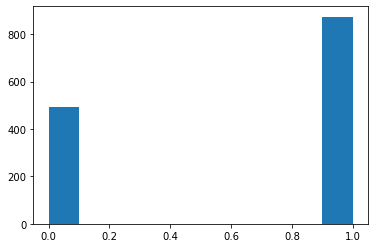

600GeV


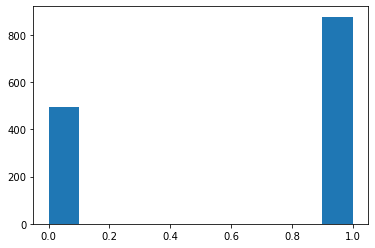

700GeV


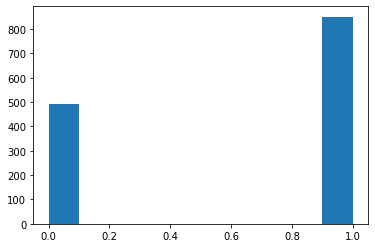

800GeV


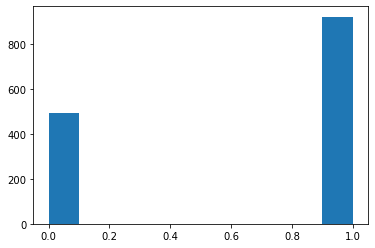

1000GeV


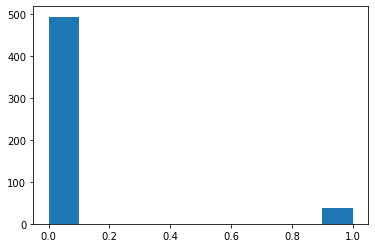

In [38]:
#this is the number of signal events in the training and test dataset
for y in range(len(y_train)):
    print (mass_points[y])
    plt.figure()
    plt.hist(y_test[y])
    plt.show()

In [39]:
for mod in range(len(modelLBN)):
    y_predictLBN[mod] = modelLBN[mod].predict(x_test[mod].values).ravel()
    Classifier_testingLBN_S[mod] = modelLBN[mod].predict(x_test[mod][y_test[mod]>=0.5].values).ravel()
    Classifier_testingLBN_B[mod] = modelLBN[mod].predict(x_test[mod][y_test[mod]<0.5].values).ravel()

500GeV


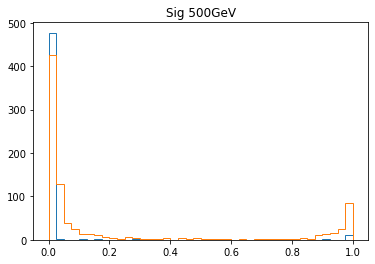

600GeV


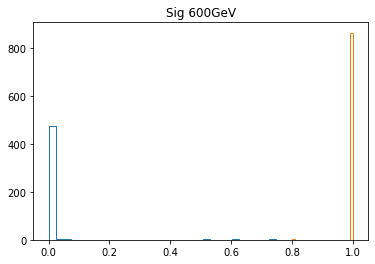

700GeV


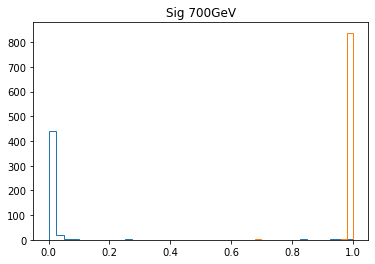

800GeV


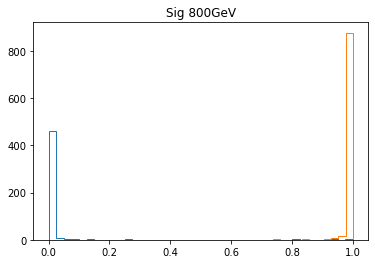

1000GeV


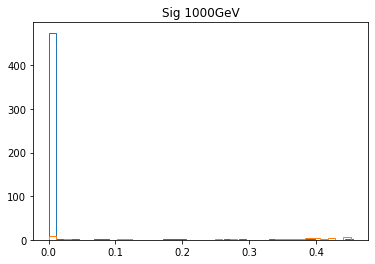

In [40]:
for y in range(len(y_predictLBN)):
    print (mass_points[y])
    plt.figure()
    plt.title('Sig '+mass_points[y])
    plt.hist(Classifier_testingLBN_B[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testingLBN_S[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.show()

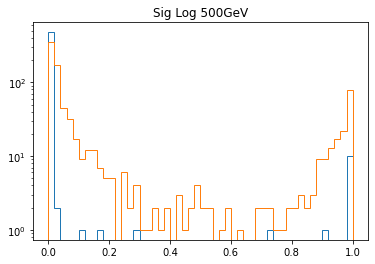

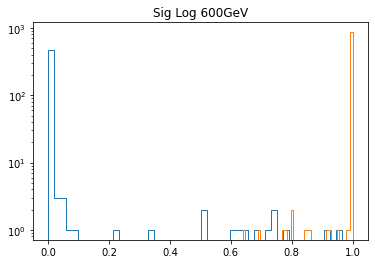

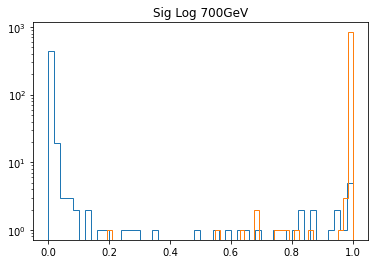

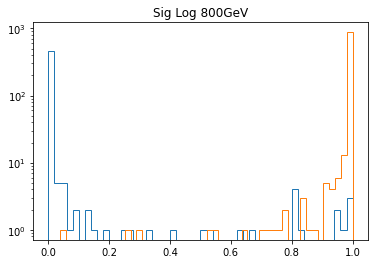

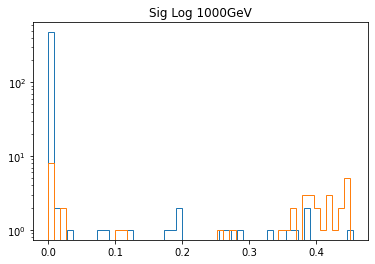

In [41]:
for y in range(len(y_predictLBN)):
    plt.figure()
    plt.title('Sig Log '+mass_points[y])
    plt.hist(Classifier_testingLBN_B[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testingLBN_S[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.yscale('log')
    plt.show()

In [42]:
n_sig_scaled = ['n_sig_scaled_500','n_sig_scaled_600','n_sig_scaled_700','n_sig_scaled_800','n_sig_scaled_1000']
nevents_sig_total = [99990,99990,99992,99993,100000]
nevents_sig_passed = [88058,88170,88285,88490,88781]
xsec_sig = [11.9866, 06.3173, 3.49089, 2.00446, 0.729204]
xsec_bkg = 729770
n_bkg_scaled = (55562/100000)*(1/.5438)*100*xsec_bkg
#n_bkg_scaled = int((1/.5438)*100*xsec_bkg)
print (n_bkg_scaled)
for i in range(len(nevents_sig_total)):
    n_sig_scaled[i] = int((nevents_sig_passed[i]/nevents_sig_total[i])*100*xsec_sig[i])
#    n_sig_scaled[i] = ((100*xsec_sig[i]))
    print (n_sig_scaled[i])
#weights = [weight for i in Classifier_testing_B]
bins_list = [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]
#bins_list = (Classifier_testing_B[y].min(),Classifier_testing_B[y].max())

74563223.13350497
1055
557
308
177
64


500GeV


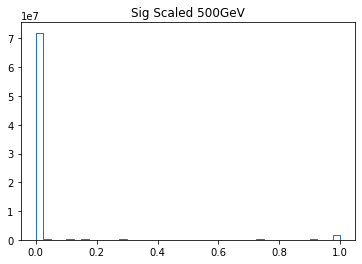

600GeV


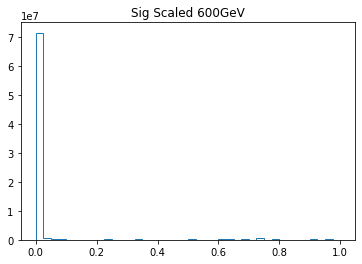

700GeV


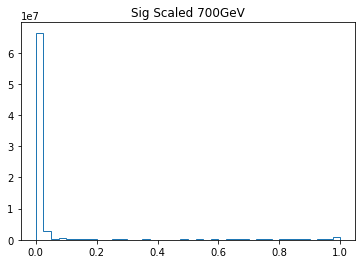

800GeV


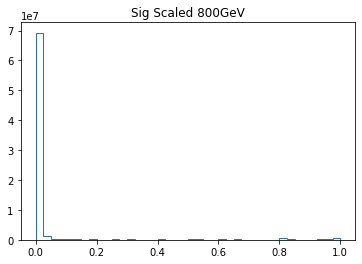

1000GeV


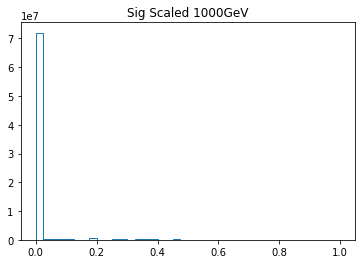

In [43]:
for y in range(len(y_predictLBN)):
    print (mass_points[y])
    plt.figure()
    plt.title('Sig Scaled '+mass_points[y])
    plt.hist(Classifier_testingLBN_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testingLBN_B[y]) for i in Classifier_testingLBN_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testingLBN_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testingLBN_S[y]) for i in Classifier_testingLBN_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.show()

500GeV


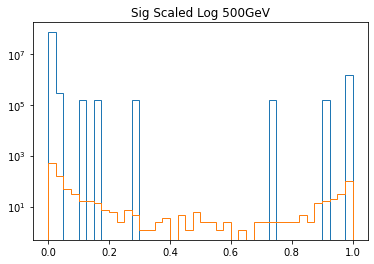

600GeV


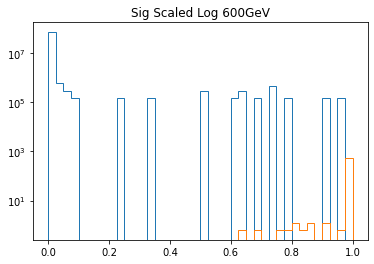

700GeV


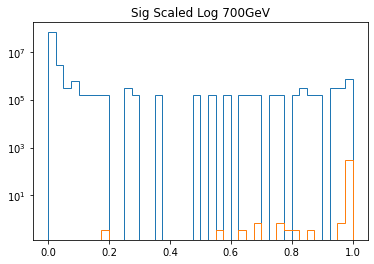

800GeV


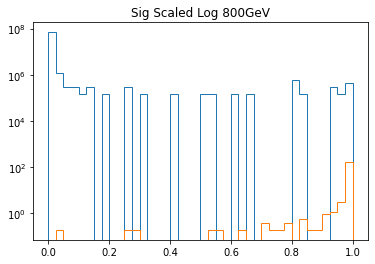

1000GeV


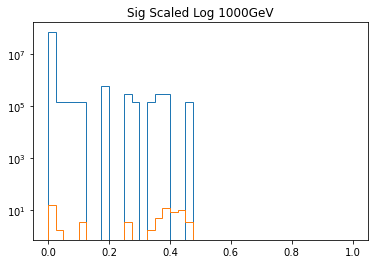

In [44]:
for y in range(len(y_predictLBN)):
    print (mass_points[y])
#    print (n_sig_scaled[y], len(Classifier_testing_S[y]), 1.0*n_sig_scaled[y]/len(Classifier_testing_S[y]), n_sig_scaled[y]/len(Classifier_testing_S[y]), sum([n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]]))
    plt.figure()
    plt.title('Sig Scaled Log '+mass_points[y])
    plt.hist(Classifier_testingLBN_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testingLBN_B[y]) for i in Classifier_testingLBN_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testingLBN_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testingLBN_S[y]) for i in Classifier_testingLBN_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.yscale('log')
    plt.show()

In [45]:
'''TO-DO: get nsig/srqt(bkg)
Select only events above .8 and throw everything else.'''
'''
for y in range(len(y_predict)):
    print(mass_points[y])
    for i, j in Classifier_testing_S[y], Classifier_testing_B[y]:
        print (i)
        if i < .8: continue
        print ()
    print (mass_points[y])
    print (y_predict[y])
    print (n_sig_scaled[y], len(Classifier_testing_S[y]), 1.0*n_sig_scaled[y]/len(Classifier_testing_S[y]), n_sig_scaled[y]/len(Classifier_testing_S[y]), sum([n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]]))
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
'''

'\nfor y in range(len(y_predict)):\n    print(mass_points[y])\n    for i, j in Classifier_testing_S[y], Classifier_testing_B[y]:\n        print (i)\n        if i < .8: continue\n        print ()\n    print (mass_points[y])\n    print (y_predict[y])\n    print (n_sig_scaled[y], len(Classifier_testing_S[y]), 1.0*n_sig_scaled[y]/len(Classifier_testing_S[y]), n_sig_scaled[y]/len(Classifier_testing_S[y]), sum([n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]]))\n    plt.figure()\n    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)\n    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )\n'

In [46]:
fprLBN_keras = ['fprLBN_keras_500','fprLBN_keras_600','fprLBN_keras_700','fprLBN_keras_800','fprLBN_keras_1000']
tprLBN_keras = ['tprLBN_keras_500','tprLBN_keras_600','tprLBN_keras_700','tprLBN_keras_800','tprLBN_keras_1000']
fnrLBN_keras = ['fnrLBN_keras_500','fnrLBN_keras_600','fnrLBN_keras_700','fnrLBN_keras_800','fnrLBN_keras_1000']
precisionLBN = ['precisionLBN_500','precisionLBN_600','precisionLBN_700','precisionLBN_800','precisionLBN_1000']
recallLBN = ['recallLBN_500','recallLBN_600','recallLBN_700','recallLBN_800','recallLBN_1000']
auc_modelLBN = ['auc_modelLBN_500','auc_modelLBN_600','auc_modelLBN_700','auc_modelLBN_800','auc_modelLBN_1000']
auc_modelLBN_rve = ['auc_modelLBN_rve_500','auc_modelLBN_rve_600','auc_modelLBN_rve_700','auc_modelLBN_rve_800','auc_modelLBN_rve_1000']
thresholdsLBN_keras = ['thresholdsLBN_keras_500','thresholdsLBN_keras_600','thresholdsLBN_keras_700','thresholdsLBN_keras_800','thresholdsLBN_keras_1000']

In [47]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import det_curve

for y in range(len(y_predictLBN)):
    y_predictLBN[y] = modelLBN[y].predict(x_test[y].values).ravel()

    fprLBN_keras[y], tprLBN_keras[y], thresholdsLBN_keras[y] = roc_curve(y_test[y], y_predictLBN[y])

    auc_modelLBN[y] = auc(tprLBN_keras[y], (1-fprLBN_keras[y]))

500GeV


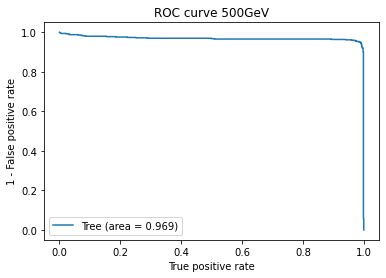

600GeV


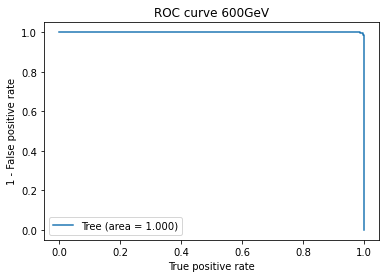

700GeV


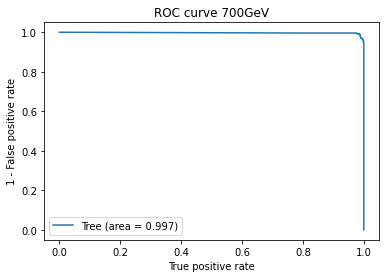

800GeV


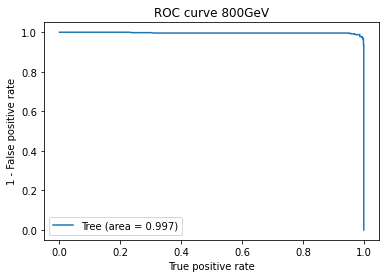

1000GeV


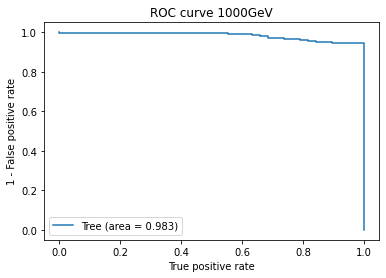

In [48]:
for a in range(len(auc_modelLBN)):
    print(mass_points[a])
    plt.figure()
#    plt.plot_precision_recall_curve(y_test[a], y_predict[a])
    plt.plot(tprLBN_keras[a], 1-fprLBN_keras[a], label='Tree (area = {:.3f})'.format(auc_modelLBN[a]))
    plt.xlabel('True positive rate')
    plt.ylabel('1 - False positive rate')
    plt.title('ROC curve '+mass_points[a])
    plt.legend(loc='best')
    plt.show()

<ipython-input-49-e9a2fc2f2a18>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tprLBN_keras[a], 1/(fprLBN_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


500GeV


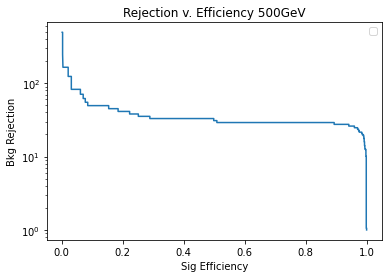

<ipython-input-49-e9a2fc2f2a18>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tprLBN_keras[a], 1/(fprLBN_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


600GeV


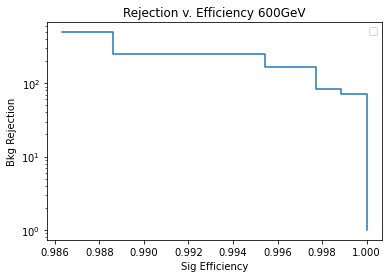

<ipython-input-49-e9a2fc2f2a18>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tprLBN_keras[a], 1/(fprLBN_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


700GeV


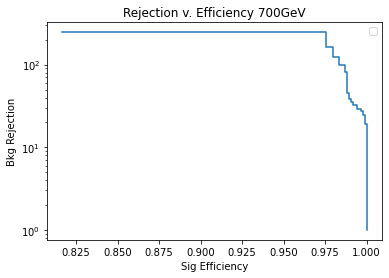

<ipython-input-49-e9a2fc2f2a18>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tprLBN_keras[a], 1/(fprLBN_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


800GeV


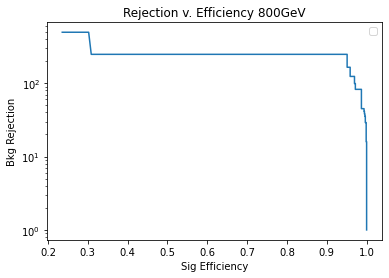

<ipython-input-49-e9a2fc2f2a18>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tprLBN_keras[a], 1/(fprLBN_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


1000GeV


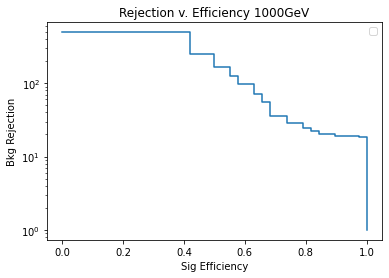

In [49]:
#for y in range(len(y_predict)):
#    auc_model_rve[y] = auc(tpr_keras[y], (1/fpr_keras[y]))
    
for a in range(len(auc_modelLBN)):
    print(mass_points[a])
    
    plt.figure()
    plt.plot(tprLBN_keras[a], 1/(fprLBN_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
    plt.xlabel('Sig Efficiency')
    plt.ylabel('Bkg Rejection')
    plt.title('Rejection v. Efficiency '+mass_points[a])
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()

In [50]:
print ('ROC curve')
area_table = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_modelLBN})
area_table

ROC curve


,mass_{H+},area
0,500GeV,0.968791
1,600GeV,0.999924
2,700GeV,0.997203
3,800GeV,0.996526
4,1000GeV,0.983220


In [51]:
#End model with LBN

In [52]:
model_500 = DefineModel(x_train[0], 0)
model_600 = DefineModel(x_train[1], 0)
model_700 = DefineModel(x_train[2], 0)
model_800 = DefineModel(x_train[3], 0)
model_1000 = DefineModel(x_train[4], 0)
model = [model_500, model_600, model_700, model_800, model_1000]

In [53]:
model[0].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[0].summary()

model[1].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[1].summary()

model[2].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[2].summary()

model[3].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[3].summary()

model[4].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[4].summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 4, 4)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 4, 4)              16        
_________________________________________________________________
dense_20 (Dense)             (None, 4, 32)             160       
_________________________________________________________________
dropout_15 (Dropout)         (None, 4, 32)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 4, 64)             2112      
_________________________________________________________________
dropout_16 (Dropout)         (None, 4, 64)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 4, 32)            

In [54]:
history = ['history_500','history_600','history_700','history_800','history_1000']
epochs = [40, 50, 60, 50, 50]

In [55]:
for i in range(len(history)):
    history[i] = NetworkLoop(x_train[i], y_train[i], x_test[i], y_test[i], model[i],mass_points[i], 20)


 500GeV 

Epoch 1/20
11/11 [==============================] - 0s 33ms/step - loss: 0.6919 - accuracy: 0.6286 - val_loss: 0.6904 - val_accuracy: 0.6389
Epoch 2/20
11/11 [==============================] - 0s 9ms/step - loss: 0.6876 - accuracy: 0.6386 - val_loss: 0.6860 - val_accuracy: 0.6389
Epoch 3/20
11/11 [==============================] - 0s 9ms/step - loss: 0.6776 - accuracy: 0.6386 - val_loss: 0.6773 - val_accuracy: 0.6389
Epoch 4/20
11/11 [==============================] - 0s 8ms/step - loss: 0.6507 - accuracy: 0.6386 - val_loss: 0.6615 - val_accuracy: 0.6389
Epoch 5/20
11/11 [==============================] - 0s 8ms/step - loss: 0.6101 - accuracy: 0.6423 - val_loss: 0.6386 - val_accuracy: 0.6389
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 0.5888 - accuracy: 0.6920 - val_loss: 0.6237 - val_accuracy: 0.6424
Epoch 7/20
11/11 [==============================] - 0s 8ms/step - loss: 0.5697 - accuracy: 0.7606 - val_loss: 0.6169 - val_accuracy: 0.7920
Epoch 8/

11/11 [==============================] - 0s 8ms/step - loss: 0.5052 - accuracy: 0.7794 - val_loss: 0.6188 - val_accuracy: 0.6470
Epoch 20/20
11/11 [==============================] - 0s 8ms/step - loss: 0.4923 - accuracy: 0.7896 - val_loss: 0.6126 - val_accuracy: 0.6558

 800GeV 

Epoch 1/20
12/12 [==============================] - 0s 30ms/step - loss: 0.6920 - accuracy: 0.6424 - val_loss: 0.6899 - val_accuracy: 0.6506
Epoch 2/20
12/12 [==============================] - 0s 8ms/step - loss: 0.6872 - accuracy: 0.6504 - val_loss: 0.6834 - val_accuracy: 0.6506
Epoch 3/20
12/12 [==============================] - 0s 8ms/step - loss: 0.6754 - accuracy: 0.6504 - val_loss: 0.6692 - val_accuracy: 0.6506
Epoch 4/20
12/12 [==============================] - 0s 8ms/step - loss: 0.6486 - accuracy: 0.6504 - val_loss: 0.6486 - val_accuracy: 0.6506
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 0.6269 - accuracy: 0.6504 - val_loss: 0.6428 - val_accuracy: 0.6506
Epoch 6/20
12/12 [

In [56]:
for mod in range(len(model)):
    print (mass_points[mod])
    model[mod].metrics_names
    model[mod].evaluate(x_test[mod].values,y_test[mod].values,batch_size=32)

500GeV
43/43 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8026
600GeV
43/43 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.7844
700GeV
43/43 [==============================] - 0s 7ms/step - loss: 0.6126 - accuracy: 0.6558
800GeV
45/45 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7033
1000GeV
17/17 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.9286


In [57]:
y_predict = ['y_predict_500','y_predict_600','y_predict_700','y_predict_800','y_predict_1000']
Classifier_testing_B = ['Classifier_testing_B500','Classifier_testing_B600','Classifier_testing_B700','Classifier_testing_B800','Classifier_testing_B1000']
Classifier_testing_S = ['Classifier_testing_S500','Classifier_testing_S600','Classifier_testing_S700','Classifier_testing_S800','Classifier_testing_S1000']

In [58]:
for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values, batch_size=32)

500GeV


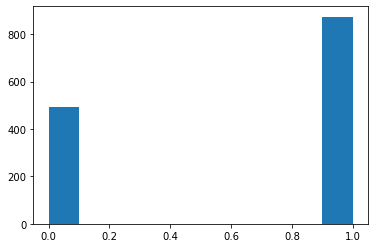

600GeV


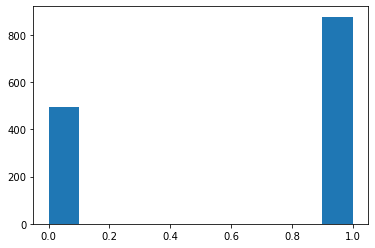

700GeV


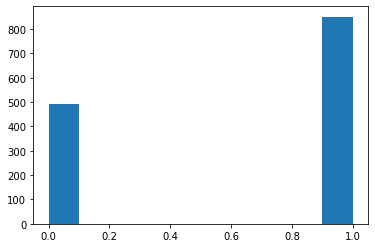

800GeV


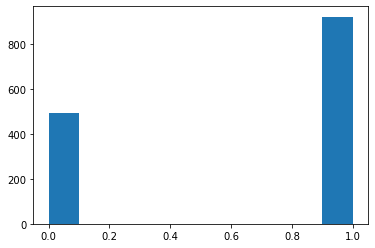

1000GeV


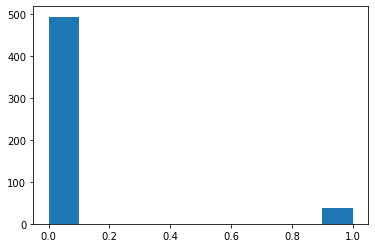

In [59]:
#this is the number of signal events in the training and test dataset
for y in range(len(y_train)):
    print (mass_points[y])
    plt.figure()
    plt.hist(y_test[y])
    plt.show()

In [60]:
for mod in range(len(model)):
    y_predict[mod] = model[mod].predict(x_test[mod].values).ravel()
    Classifier_testing_S[mod] = model[mod].predict(x_test[mod][y_test[mod]>=0.5].values).ravel()
    Classifier_testing_B[mod] = model[mod].predict(x_test[mod][y_test[mod]<0.5].values).ravel()

500GeV


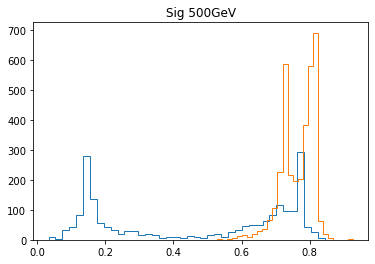

600GeV


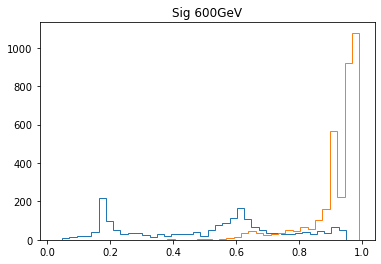

700GeV


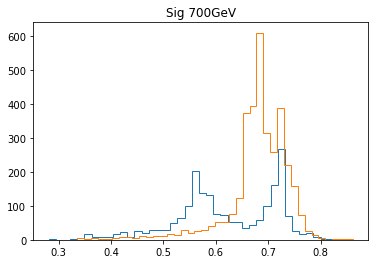

800GeV


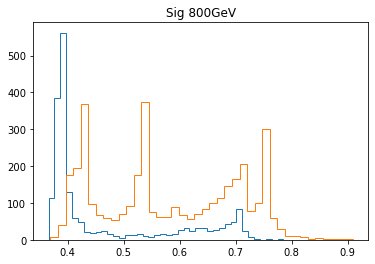

1000GeV


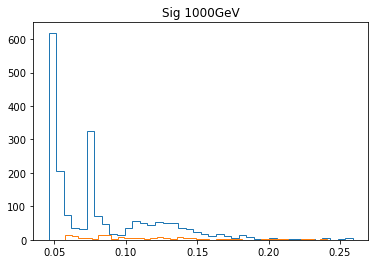

In [61]:
for y in range(len(y_predict)):
    print (mass_points[y])
    plt.figure()
    plt.title('Sig '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.show()

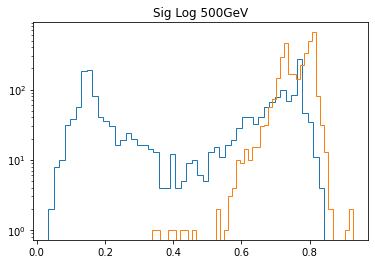

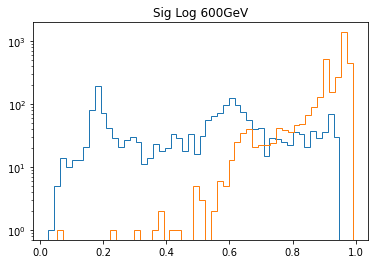

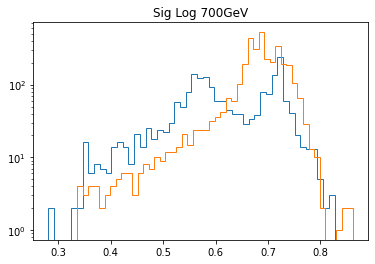

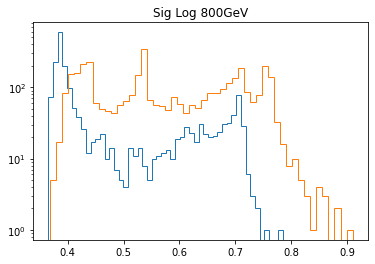

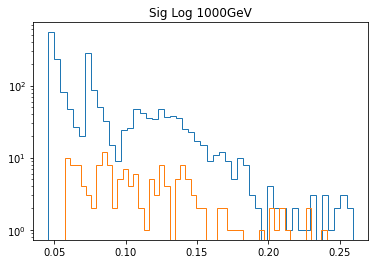

In [62]:
for y in range(len(y_predict)):
    plt.figure()
    plt.title('Sig Log '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.yscale('log')
    plt.show()

In [63]:
n_sig_scaled = ['n_sig_scaled_500','n_sig_scaled_600','n_sig_scaled_700','n_sig_scaled_800','n_sig_scaled_1000']
nevents_sig_total = [99990,99990,99992,99993,100000]
nevents_sig_passed = [88058,88170,88285,88490,88781]
xsec_sig = [11.9866, 06.3173, 3.49089, 2.00446, 0.729204]
xsec_bkg = 729770
n_bkg_scaled = (55562/100000)*(1/.5438)*100*xsec_bkg
#n_bkg_scaled = int((1/.5438)*100*xsec_bkg)
print (n_bkg_scaled)
for i in range(len(nevents_sig_total)):
    n_sig_scaled[i] = int((nevents_sig_passed[i]/nevents_sig_total[i])*100*xsec_sig[i])
#    n_sig_scaled[i] = ((100*xsec_sig[i]))
    print (n_sig_scaled[i])
#weights = [weight for i in Classifier_testing_B]
bins_list = [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]
#bins_list = (Classifier_testing_B[y].min(),Classifier_testing_B[y].max())

74563223.13350497
1055
557
308
177
64


500GeV


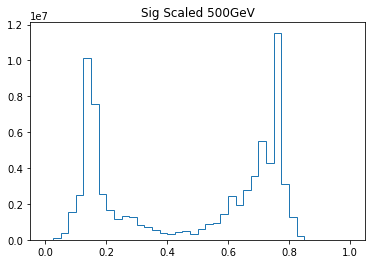

600GeV


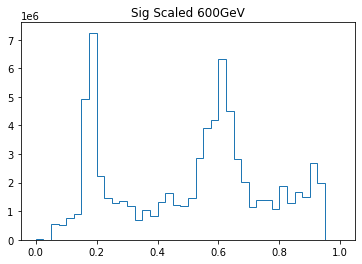

700GeV


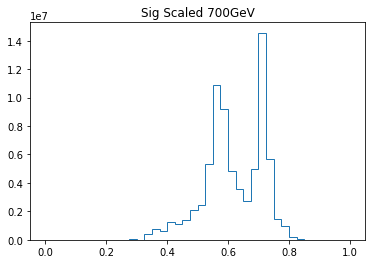

800GeV


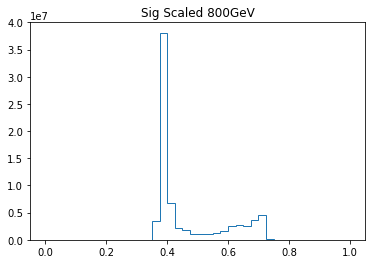

1000GeV


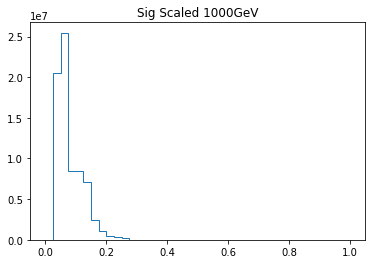

In [64]:
for y in range(len(y_predict)):
    print (mass_points[y])
    plt.figure()
    plt.title('Sig Scaled '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.show()

500GeV


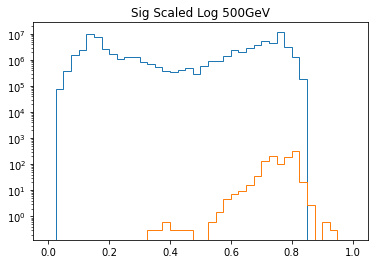

600GeV


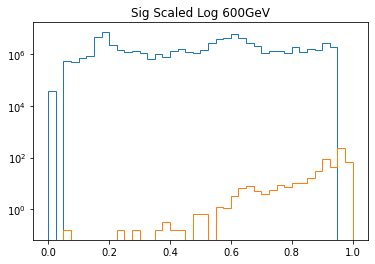

700GeV


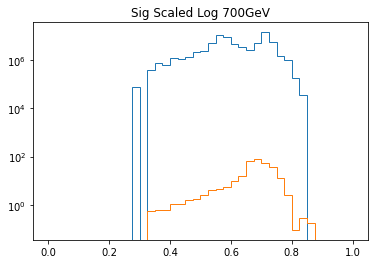

800GeV


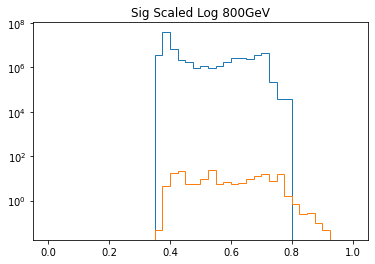

1000GeV


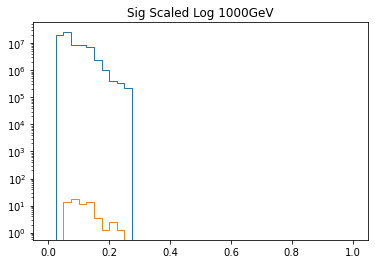

In [65]:
for y in range(len(y_predict)):
    print (mass_points[y])
#    print (y_predict[y])
#    print (n_sig_scaled[y], len(Classifier_testing_S[y]), 1.0*n_sig_scaled[y]/len(Classifier_testing_S[y]), n_sig_scaled[y]/len(Classifier_testing_S[y]), sum([n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]]))
    plt.figure()
    plt.title('Sig Scaled Log '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.yscale('log')
    plt.show()

In [66]:
'''TO-DO: get nsig/srqt(bkg)
Select only events above .8 and throw everything else.'''
'''
for y in range(len(y_predict)):
    print(mass_points[y])
    for i, j in Classifier_testing_S[y], Classifier_testing_B[y]:
        print (i)
        if i < .8: continue
        print ()
    print (mass_points[y])
    print (y_predict[y])
    print (n_sig_scaled[y], len(Classifier_testing_S[y]), 1.0*n_sig_scaled[y]/len(Classifier_testing_S[y]), n_sig_scaled[y]/len(Classifier_testing_S[y]), sum([n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]]))
    plt.figure()
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
'''

'\nfor y in range(len(y_predict)):\n    print(mass_points[y])\n    for i, j in Classifier_testing_S[y], Classifier_testing_B[y]:\n        print (i)\n        if i < .8: continue\n        print ()\n    print (mass_points[y])\n    print (y_predict[y])\n    print (n_sig_scaled[y], len(Classifier_testing_S[y]), 1.0*n_sig_scaled[y]/len(Classifier_testing_S[y]), n_sig_scaled[y]/len(Classifier_testing_S[y]), sum([n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]]))\n    plt.figure()\n    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)\n    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )\n'

In [67]:
fpr_keras = ['fpr_keras_500','fpr_keras_600','fpr_keras_700','fpr_keras_800','fpr_keras_1000']
tpr_keras = ['tpr_keras_500','tpr_keras_600','tpr_keras_700','tpr_keras_800','tpr_keras_1000']
fnr_keras = ['fnr_keras_500','fnr_keras_600','fnr_keras_700','fnr_keras_800','fnr_keras_1000']
precision = ['precision_500','precision_600','precision_700','precision_800','precision_1000']
recall = ['recall_500','recall_600','recall_700','recall_800','recall_1000']
auc_model = ['auc_model_500','auc_model_600','auc_model_700','auc_model_800','auc_model_1000']
auc_model_rve = ['auc_model_rve_500','auc_model_rve_600','auc_model_rve_700','auc_model_rve_800','auc_model_rve_1000']
thresholds_keras = ['thresholds_keras_500','thresholds_keras_600','thresholds_keras_700','thresholds_keras_800','thresholds_keras_1000']

In [68]:
for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values).ravel()

    fpr_keras[y], tpr_keras[y], thresholds_keras[y] = roc_curve(y_test[y], y_predict[y])

    auc_model[y] = auc(tpr_keras[y], (1-fpr_keras[y]))

ValueError: Found input variables with inconsistent numbers of samples: [1368, 5472]

In [ ]:
for a in range(len(auc_model)):
    print(mass_points[a])
    plt.figure()
#    plt.plot_precision_recall_curve(y_test[a], y_predict[a])
    plt.plot(tpr_keras[a], 1-fpr_keras[a], label='Tree (area = {:.3f})'.format(auc_model[a]))
    plt.xlabel('True positive rate')
    plt.ylabel('1 - False positive rate')
    plt.title('ROC curve '+mass_points[a])
    plt.legend(loc='best')
    plt.show()

In [ ]:
#for y in range(len(y_predict)):
#    auc_model_rve[y] = auc(tpr_keras[y], (1/fpr_keras[y]))
    
for a in range(len(auc_model)):
    print(mass_points[a])
    
    plt.figure()
    plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
    plt.xlabel('Sig Efficiency')
    plt.ylabel('Bkg Rejection')
    plt.title('Rejection v. Efficiency '+mass_points[a])
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()

In [ ]:
print ('ROC curve')
area_table = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model})
area_table

In [ ]:
#End model without LBN